In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_lg")

from tqdm import tqdm
tqdm.pandas()   

from src import config
from src.datasets import TextConcatFactCheck, TextConcatPosts
from src.utils import cleaning_spacy, cleaning_spacy_batch

tasks_path = config.TASKS_PATH
posts_path = config.POSTS_PATH
fact_checks_path = config.FACT_CHECKS_PATH
gs_path = config.GS_PATH
lang = 'eng'
task_name = "crosslingual"

print("Loading Fact Checks...")
fc = TextConcatFactCheck(fact_checks_path, tasks_path=tasks_path, task_name=task_name, lang=lang, version="english", clean=True)
fc_orig = TextConcatFactCheck(fact_checks_path, tasks_path=tasks_path, task_name=task_name, lang=lang, version="original", clean=True)
print("Loading Fact Checks (English + Clean)...")
# fc_eng = TextConcatFactCheck(fact_checks_path, tasks_path=tasks_path, task_name=task_name, lang=lang, version="english", cleaning_function=lambda x: cleaning_spacy_batch(x, nlp))

print("Loading Posts...")
posts = TextConcatPosts(posts_path, tasks_path=tasks_path, task_name=task_name, lang=lang, gs_path=gs_path, version="english", clean=True)
posts_orig = TextConcatPosts(posts_path, tasks_path=tasks_path, task_name=task_name, lang=lang, gs_path=gs_path, version="original", clean=True)

/gpfs/projects/bsc14/scratch/.conda/factcheck/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading Fact Checks...
Loading Fact Checks (English + Clean)...
Loading Posts...


In [2]:
df_train_orig = posts_orig.df_train
df_train_eng = posts.df_train

df_train_orig = pd.merge(df_train_eng, df_train_orig[["full_text"]], left_index=True, right_index=True, suffixes=('', '_orig'))
# df_train_orig["full_text"] = df_train_orig["full_text"] + " " + df_train_orig["full_text_orig"]

df_dev_orig = posts_orig.df_dev

df_fc_orig = fc_orig.df
df_fc = fc.df

df_fc = pd.merge(df_fc, df_fc_orig[["full_text"]], left_index=True, right_index=True, suffixes=('', '_orig'))
# df_fc["full_text"] = df_fc["full_text"] + " " + df_fc["full_text_orig"]


In [3]:
df_train_orig

,ocr,verdicts,text,lan,fb,tw,ig,full_text,gs,full_text_orig
post_id,,,,,,,,,,
64,#Curfew6:00 p.m.: The government plans to pay ...,,,fra,1,0,0,France : #Curfew6:00 p.m.: The government plan...,[40901],France : #CouvreFeu18h00: Le gouvernement envi...
79,* Cold water closes 4 heart veins and causes a...,False information,,fra,1,0,0,France : * Cold water closes 4 heart veins and...,[80411],France : * L'eau froide ferme 4 veines du cœur...
86,*INFO ALERT FROM THE MINISTRY OF HEALTH.* Watc...,False information,,fra,1,0,0,France : *INFO ALERT FROM THE MINISTRY OF HEAL...,[136895],France : *ALERTE INFO DU MINISTERE DE LA SANTE...
182,"2:24 p.m. As of March 1, 2021, the CONFINEMENT...",False information,,fra,1,0,0,"France : 2:24 p.m. As of March 1, 2021, the CO...",[133424],"France : 14 h 24 À compter du 1er mars 2021, l..."
192,15:15 : = all 5% FRANCE at STAGE 4 What France...,False information,,fra,1,0,0,France : 15:15 : = all 5% FRANCE at STAGE 4 Wh...,[79930],France : 15:15 : = all 5% La FRANCE au STADE 4...
...,...,...,...,...,...,...,...,...,...,...
28017,THE HEALTH PASS IS NOT NECESSARY TO GIVE BLOOD...,Missing context,🤡🤥🤥🤥 Here is the proof that the Covid19 is an ...,fra,1,0,0,France : THE HEALTH PASS IS NOT NECESSARY TO G...,[82733],France : LE PASS SANITAIRE N'EST PAS NÉCESSAIR...
28018,THE HEALTH PASS IS NOT NECESSARY TO GIVE BLOOD...,Missing context,🤡🤥🤥🤥 Here is the proof that the Covid19 is an ...,fra,1,0,0,France : THE HEALTH PASS IS NOT NECESSARY TO G...,[82733],France : LE PASS SANITAIRE N'EST PAS NÉCESSAIR...
28024,A nurse hands this journalist instead - AURELI...,False information,🤣 take this in your teeth,fra,1,0,0,France : A nurse hands this journalist instead...,[137286],France : Un infirmier remet ce journaliste à s...


In [4]:
df_train_orig.shape

(1443, 10)

In [5]:
print(df_train_orig["full_text"].sample(10).to_markdown())

|   post_id | full_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [6]:
df_fc

,claim,instances,title,full_text,full_text_orig
fact_check_id,,,,,
15,“There is a video that will be launched tomorr...,[https://www.20minutes.fr/high-tech/3216775-20...,"WhatsApp: A ""Martinelli"" video that will conta...","WhatsApp: A ""Martinelli"" video that will conta...",WhatsApp : Une vidéo « Martinelli » qui va con...
136,"""1960 we were only 3% of literate women. If we...",[http://africacheck.org/fr/fact-checks/article...,Fatou Sarr Sow is wrong about the female liter...,Fatou Sarr Sow is wrong about the female liter...,Fatou Sarr Sow se trompe sur le taux d’alphabé...
155,"""25% of vaccine-related side effects are serious""",[https://www.liberation.fr/checknews/est-il-vr...,Is it true that 25% of side effects from Covid...,Is it true that 25% of side effects from Covid...,Est-il vrai que 25% des effets secondaires des...
156,"""26 armed groups"" have surrendered in the prov...",[https://factuel.afp.com/non-les-autorites-con...,"No, the Congolese authorities have not recorde...","No, the Congolese authorities have not recorde...","Non, les autorités congolaises n’ont pas enreg..."
187,"""5% of students use drugs"".",[http://africacheck.org/fr/fact-checks/article...,Senegal: Do 5% of students use drugs?,"Senegal: Do 5% of students use drugs? ""5% of s...",Sénégal : 5 % des élèves consomment-ils de la ...
...,...,...,...,...,...
156402,"""You fired 15,000 caregivers [...] because you...",[https://www.dna.fr/societe/2022/04/22/15-000-...,"Désinfox WERE 15,000 CAREGIVERS LAID OFF BECAU...","Désinfox WERE 15,000 CAREGIVERS LAID OFF BECAU...",Désinfox 15 000 SOIGNANTS ONT-ILS ÉTÉ LICENCIÉ...
156686,At 74 she gives birth to a newborn,[https://factuel.afp.com/faux-ces-deux-images-...,"False, these two images have no connection and...","False, these two images have no connection and...","Faux, ces deux images n'ont aucun lien et ne m..."
156687,"In Hong Kong, people are destroying facial rec...",[https://dpa-factchecking.com/belgium/220512-9...,A 'smart' lamppost destroyed by protesters in ...,A 'smart' lamppost destroyed by protesters in ...,Un lampadaire « intelligent » détruit par des ...


In [7]:
import spacy_dbpedia_spotlight
# load your model as usual
nlp_en = spacy.load('es_core_news_lg')
# add the pipeline stage
nlp.add_pipe('dbpedia_spotlight')
# get the document
doc = nlp('The president of USA is calling Boris Johnson to decide what to do about coronavirus. El presidente de España, Pedro Sánchez, ha decidido que se va a vacunar contra el coronavirus.')
# see the entities
print('Entities', [(ent.text, ent.label_, ent.kb_id_) for ent in doc.ents])
# inspect the raw data from DBpedia spotlight
print(doc.ents[0]._.dbpedia_raw_result)

Entities [('USA', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/United_States'), ('Boris Johnson', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/Boris_Johnson'), ('coronavirus', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/COVID-19_pandemic'), ('El presidente', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/Ramon_Fernandez'), ('Pedro Sánchez', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/Pedro_Sánchez'), ('coronavirus', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/COVID-19_pandemic')]
{'@URI': 'http://dbpedia.org/resource/United_States', '@support': '468823', '@types': 'Wikidata:Q6256,Schema:Place,Schema:Country,DBpedia:PopulatedPlace,DBpedia:Place,DBpedia:Location,DBpedia:Country', '@surfaceForm': 'USA', '@offset': '17', '@similarityScore': '0.9998315688056311', '@percentageOfSecondRank': '1.3887880107912574E-4'}


In [8]:
import tqdm
tqdm.tqdm.pandas()

df_train_orig_mini = df_train_orig.sample(100, random_state=42)
df_train_orig_mini["entities"] = df_train_orig_mini["full_text"].progress_apply(lambda x: set([ent.kb_id_ for ent in nlp(x.lower()).ents if ent.kb_id_ != '' ]))
print(df_train_orig_mini.to_markdown())

100%|██████████| 100/100 [00:18<00:00,  5.50it/s]


|   post_id | ocr                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [9]:
df_train_orig_mini

,ocr,verdicts,text,lan,fb,tw,ig,full_text,gs,full_text_orig,entities
post_id,,,,,,,,,,,
8099,,False information,DIABETES AROUND THE WORLD. This ends your suff...,fra,2,0,0,France : DIABETES AROUND THE WORLD. This ends...,[82629],France : DIABÉTIQUE DU MONDE ENTIER. Ceci met...,"{http://dbpedia.org/resource/Blender, http://d..."
7081,BACK TO SCHOOL RISKS TO BE ACTIVE FOR THE SHEE...,,It's in progress in GERMANY and ENGLAND... Par...,fra,1,0,0,France : BACK TO SCHOOL RISKS TO BE ACTIVE FOR...,[119945],France : LA RENTREE SCOLAIRE RISQUE D'ÊTRE MOU...,{http://dbpedia.org/resource/Kingdom_of_Englan...
19148,COVID-19 COVID-19 Ag we are taken for assholes,False information,Covid test positive with tap water!,fra,1,0,0,France : COVID-19 COVID-19 Ag we are taken for...,[136726],France : COVID-19 COVID-19 Ag on nous prend po...,"{http://dbpedia.org/resource/COVID-19_testing,..."
1620,Orange F 13:41 THE NEWSPAPER MEDIAPART AUGUST ...,False information,,fra,1,0,0,France : Orange F 13:41 THE NEWSPAPER MEDIAPAR...,[79549],France : Orange F 13:41 LE JOURNAL MEDIAPART 1...,{http://dbpedia.org/resource/Guillermo_Saavedr...
18945,,Partly false information,TOUADERA has just formally prohibited FRANCE a...,fra,1,0,0,France : TOUADERA has just formally prohibite...,[79801],France : TOUADERA vient d'interdire formellem...,"{http://dbpedia.org/resource/France, http://db..."
...,...,...,...,...,...,...,...,...,...,...,...
13742,,,Lidl d'Aubervilliers limits Saint-Denis today....,fra,1,0,0,France : Lidl d'Aubervilliers limits Saint-De...,[137916],France : Lidl d’Aubervilliers limite Saint-De...,{http://dbpedia.org/resource/Saint-Denis_stati...
11047,WORLD ECONOMIC UM ITED TO THE STATE VORLD,False information,War - Epidemic All questions bring us back to ...,fra,1,0,0,France : WORLD ECONOMIC UM ITED TO THE STATE V...,[78536],France : WORLD ECONOMIC UM ITED TO THE STATE V...,{http://dbpedia.org/resource/World_Economic_Fo...
16443,,False information,"Meanwhile, in South Korea, huge protests are t...",fra,1,0,0,"France : Meanwhile, in South Korea, huge prot...",[138035],"France : Pendant ce temps, en Corée du Sud, d...","{http://dbpedia.org/resource/Neoliberalism, ht..."


In [10]:
df_train_orig.lan.unique()

array(['fra', 'ces', 'so', 'eng', 'ht', 'ln', 'spa', 'tgl', 'ara'],
      dtype=object)

In [11]:
df_train_orig[df_train_orig.lan == '']

,ocr,verdicts,text,lan,fb,tw,ig,full_text,gs,full_text_orig
post_id,,,,,,,,,,


<Axes: >

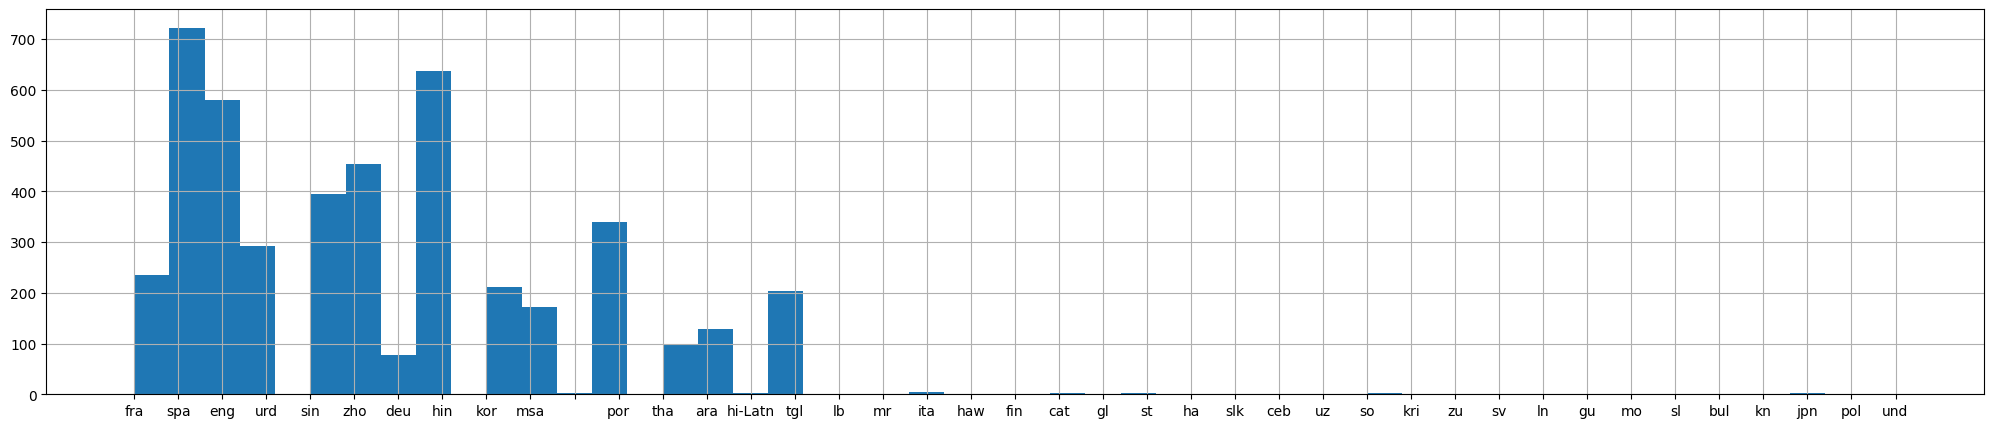

In [3]:
df_train_orig.lan.hist(figsize=(25, 5), bins=50)

In [13]:
print(df_train_orig[df_train_orig.lan == ''].to_markdown())

| post_id   | ocr   | verdicts   | text   | lan   | fb   | tw   | ig   | full_text   | gs   | full_text_orig   |
|-----------|-------|------------|--------|-------|------|------|------|-------------|------|------------------|


In [3]:
from src.models import BaseModel
from tqdm import tqdm


class IEModel(BaseModel):
    '''
    This model receives:
        - Fact-check claims dataset with a column called full_text
        - Spacy model name
    
    Applies Spacy NER to the full_text column and stores the entities in a set.
    Applies lemmatisation to the full_text column and stores the lemmas in a set.
    
    Compares the entities and lemmas of the fact-check claims with the entities and lemmas of the posts.
    Take the k first fact check for each post with the highest number of common entities and lemmas.
    '''
    
    def __init__(self, model_name, df_fc, device="cuda",  k=10, batch_size=512, linking=False, **kwargs):
        # "en_core_web_sm"
        if device == "cuda":
            spacy.require_gpu()
        
        if not spacy.util.is_package(model_name):
            import os
            os.system(f"python -m spacy download {model_name}")

            
        self.model = spacy.load(model_name)
        self.linking = linking
        
        if self.linking:
            # @Language.component("lowercase_component")
            # def lowercase_component(doc):
            #     # Create a new Doc object with lowercase text
            #     return self.model.make_doc(doc.text.lower())

            import spacy_dbpedia_spotlight
            self.model.add_pipe('dbpedia_spotlight')

            # self.model.add_pipe('lowercase_component', name="lowercase", before="dbpedia_spotlight")
            
            
        # self.idx_to_text = df_fc["full_text"].to_dict()
        self.pos_to_idx = dict(enumerate(df_fc.index))
        self.vectorized_map = np.vectorize(lambda x: self.pos_to_idx.get(x, None))                
        super().__init__(device, k=k, batch_size=batch_size)
        if k is None:
            self.k = len(df_fc)
            
        self.emb_fc = self.encode(df_fc["full_text"].values)

    
    def encode(self, texts):
        if self.linking:
            # Use tqdm to wrap the pipeline
            processed = [
                self.process_text_ents(doc)
                for doc in tqdm(
                    self.model.pipe(texts, batch_size=self.batch_size),
                    total=len(texts),
                    desc="Processing texts"
                )
            ]
        else:
            processed = [
                self.process_text(doc)
                for doc in tqdm(
                    self.model.pipe(texts, batch_size=self.batch_size),
                    total=len(texts),
                    desc="Processing texts"
                )
            ]
        
        return processed


    def train(self, texts):
        pass

    def predict(self, texts, debug=False):
        # emb_texts = self.encode(texts)#.values  # Convert to a list or numpy array for faster iteration
        # fc_texts = self.emb_fc#.values

        # # Calculate intersections efficiently
        # preds = []
        # for emb in emb_texts:
        #     common_counts = np.array([len(emb & fc_el) for fc_el in fc_texts])
        #     top_k_indices = np.argsort(-common_counts)[:self.k]  # Sort and pick top k indices
        #     preds.append([self.pos_to_idx[i] for i in top_k_indices])
        
        ls_lemmas = self.emb_fc
        set_ls_lemmas = [set(y) for y in ls_lemmas]
        
        text_emb = self.encode(texts)
        ls_intersec = [[set(x).intersection(y) for y in set_ls_lemmas] for x in text_emb]
        len_intersec = [[len(x) for x in y] for y in ls_intersec]
        # top_nonzero = [self.non_zero_in_top(np.array(x), k=self.k) for x in ls_intersec]
        top_nonzero = [np.argsort(-np.array(x))[:self.k] for x in len_intersec]
        preds = [[self.pos_to_idx[i] for i in x] for x in top_nonzero]
        if debug:
            return preds, len_intersec, ls_intersec, top_nonzero
        else:
            return preds

    @staticmethod
    def non_zero_in_top(arr, k=None):
        # get the indices of the top nonzero elements
        if k is None:
            k = len(arr)
        top = np.argsort(-arr)[:k]
        non_zero = np.nonzero(arr)[0]
        # get the nonzero elements in top preserving the order of top
        non_zero_in_top = [x for x in top if x in non_zero]
        return non_zero_in_top
    
    @staticmethod
    def process_text(doc):
        # Extract lemmatized tokens (including named entities), excluding punctuation and stopwords and spaces
        return [token.lemma_ for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
    
    @staticmethod
    def process_text_ents(doc):
        # Extract lemmatized tokens (including named entities), excluding punctuation and stopwords and spaces
        # return [ent.kb_id_ for ent in doc.ents if ent.kb_id_ != '' ] + [txt for ent in doc.ents for txt in ent.text.split() if ent.text != '' ]
        return [ent.kb_id_ for ent in doc.ents if ent.kb_id_ != '' ]


In [15]:
import spacy

# Load the multilingual NER model
nlp = spacy.load("xx_ent_wiki_sm")
doc = nlp("Barack Obama was the president of the United States.")

# Extract named entities
for ent in doc.ents:
    print(ent.text, ent.label_)


Barack Obama PER
United States LOC


In [16]:
ie_model = IEModel("en_core_web_lg", df_fc.iloc[:10], linking=True, batch_size=2048)

Processing texts: 100%|██████████| 10/10 [00:02<00:00,  4.38it/s]

batch_size 2048


In [17]:
ie_model_es = IEModel("fr_core_news_lg", df_fc.iloc[:10], linking=True, batch_size=2048)

Processing texts: 100%|██████████| 10/10 [00:01<00:00,  8.84it/s]

batch_size 2048


In [18]:
ents = ie_model.encode(df_train_orig_mini["full_text"].str.replace("#", "").values)
ents_es = ie_model_es.encode(df_train_orig_mini["full_text_orig"].str.replace("#", "").values)

Processing texts:   0%|          | 0/100 [00:00<?, ?it/s]

batch_size 2048


Processing texts:   0%|          | 0/100 [00:00<?, ?it/s]

batch_size 2048


Processing texts: 100%|██████████| 100/100 [00:04<00:00, 24.89it/s]


In [19]:
df_train_orig_mini["entities"] = ents
df_train_orig_mini["entities_es"] = ents_es

In [20]:
total_score = 0

for i, row in df_train_orig_mini.iterrows():
    print(row["full_text"])
    print(row["full_text_orig"])
    ents_comb = set(row["entities"] + row["entities_es"])
    print(set(row["entities"]))
    print(set(row["entities_es"]))

    print()
    
    fc_ents_tot = []
    for gs in row["gs"]:
        print(df_fc.loc[gs]["full_text"])
        print(df_fc.loc[gs]["full_text_orig"])
        fc_ents = list(set(ie_model.encode([df_fc.loc[gs]["full_text"]])[0]))
        fc_ents_tot += fc_ents
        
        fc_ents_es = list(set(ie_model_es.encode([df_fc.loc[gs]["full_text_orig"]])[0]))
        print()
        print(fc_ents)
        print(fc_ents_es)
        fc_ents_tot += fc_ents_es
        
        print()
    
    if np.intersect1d(fc_ents_tot, list(ents_comb)).shape[0] > 0:
        total_score += 1
    else:
        print("NO MATCH")
        
    print("----" * 10)

France :  DIABETES AROUND THE WORLD. This ends your suffering. Take this vegetable (THE SQUASH): WASH AND CUT the whole fruit. Don't throw anything away. Crush the mixture in a mortar, Or crush on a stone Or using a blender Squeeze and drink a glass of this fusion every morning on an empty stomach for 7 days. 2 to 3 hours before the meal. Go home to redo your exams. You would be surprised. This is valid for any form of diabetes. TEST AND APPROVED!
France :  DIABÉTIQUE DU MONDE ENTIER. Ceci met fin a vos souffrances. Prenez ce legume( LA COURGE) : LAVEZ ET DÉCOUPER le fruit entier. Ne jetez rien. Pilez le melange dans un mortié, Ou écraser sur une pierre Ou à l'aide d'un mixeur Pressez et buvez un verre de cette fusion tous les matins à jeun pendant 7 jours. 2 à 3 heures avant le repas. Rentrer refaire vos examens. Vous seriez surpris. Ceci est valable pour toute forme de diabetes. TESTEZ ET APPROUVÉ !
{'http://dbpedia.org/resource/Brian_Adams_(wrestler)', 'http://dbpedia.org/resource/G

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


batch_size 2048

['http://dbpedia.org/resource/Diabetes', 'http://dbpedia.org/resource/Cucurbita']
['http://fr.dbpedia.org/resource/Courge', 'http://fr.dbpedia.org/resource/Diabète_sucré']

----------------------------------------
France : BACK TO SCHOOL RISKS TO BE ACTIVE FOR THE SHEEP. BY DUE TO REMAIN PASSIVE EXCEPT TO PLAY THE COLLABOS WHEN HE IS TO DENOUNCE HIS NEIGHBOR WHO IS NOT WEARING HIS MASK HERE IS WHAT HANGING IN YOUR NOSE GERMANY AND ENGLAND. IF A CASE OF A COVID-POSITIVE KID IS DETECTED, YOUR KID WILL BE AUTOMATICALLY CONFINED IN A QUARANTINE AREA AND WITHOUT NEED FOR PARENTAL CONSENT, AND WITHOUT OBLIGATION TO TELL YOU WHERE IT IS It's in progress in GERMANY and ENGLAND. Parents would have received letters from schools, warning of NEW DIRECTIVES RELATED to the BACK TO SCHOOL.  YOUR CHILD IS POSITIVE, HE WILL BE EVACUATED IN QUARANTINE ZONE WITHOUT HIS PARENTS BEING ABLE TO DO OR SEE ANYTHING DURING THE PERIOD . Everything is done for Your SAFETY and the WELL-BEING of yo

Processing texts:   0%|          | 0/1 [00:00<?, ?it/s]

batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


batch_size 2048

['http://dbpedia.org/resource/Nazi_Germany', 'http://dbpedia.org/resource/Quarantine', 'http://dbpedia.org/resource/Positif_(magazine)', 'http://dbpedia.org/resource/Confine']
['http://fr.dbpedia.org/resource/SARS-CoV-2', 'http://fr.dbpedia.org/resource/Virus', 'http://fr.dbpedia.org/resource/Allemagne', 'http://fr.dbpedia.org/resource/Angleterre']

NO MATCH
----------------------------------------
France : COVID-19 COVID-19 Ag we are taken for assholes Covid test positive with tap water!
France : COVID-19 COVID-19 Ag on nous prend pour des cons Test Covid positif à l'eau du robinet !
{'http://dbpedia.org/resource/COVID-19_testing', 'http://dbpedia.org/resource/Kingdom_of_France'}
{'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/SARS-CoV-2', 'http://fr.dbpedia.org/resource/Eau'}

Watch out for this video purporting to show a 'water positive' Covid test A Covid self-test is positive for water Attention à cette vidéo prétendant montrer un test Co

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


batch_size 2048

['http://dbpedia.org/resource/COVID-19_testing', 'http://dbpedia.org/resource/Positif_(magazine)', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/Eau']

----------------------------------------
France : Orange F 13:41 THE NEWSPAPER MEDIAPART AUGUST 11, 2021 - EVENING EDITION THE STUDIO . The Pasteur Institute recognizes the effectiveness of IVERMECTIN. AUGUST 10, 2021 . BY GUILLERMO SAAVEDRA . BLOG: THE GUILLERMO SAAVEDRA'S BLOG THE CLUB A single take could at some people eradicate all SARS genetic material Covid-19. A single dose of ivermectin is capable in vitro to eradicate all material genetics of SARS-Cov-2 in 48 hours O < 
France : Orange F 13:41 LE JOURNAL MEDIAPART 11 AOÛT 2021 - ÉDITION DU SOIR LE STUDIO . L'institut Pasteur reconnaît l'efficacité de L'IVERMECTINE. 10 AOÛT 2021 . PAR GUILLERMO SAAVEDRA . BLOG: LE BLOG DE GUILLERMO SAAVEDRA LE CLUB Une seule prise pourrait chez certaines personnes éradiquer tous le matériel génétique du SA

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


batch_size 2048

['http://dbpedia.org/resource/Materiel', 'http://dbpedia.org/resource/Ivermectin', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Pasteur_Institute', 'http://dbpedia.org/resource/Severe_acute_respiratory_syndrome_coronavirus_2']
['http://fr.dbpedia.org/resource/Génétique', 'http://fr.dbpedia.org/resource/SARS-CoV-2', 'http://fr.dbpedia.org/resource/Institut_Pasteur', 'http://fr.dbpedia.org/resource/Ivermectine']

----------------------------------------
France :  TOUADERA has just formally prohibited FRANCE and its CFA vassals, as well as MINUSCA, from flying over the airspace of CENTRAL AFRICA. MACROn sees AFRIC inevitably escaping the French economy 
France :  TOUADERA vient d'interdire formellement à la FRANCE et à ses vassaux CFA, ainsi qu'à la MINUSCA le survol de l'espace aérien de la CENTRAFRIQUE. MACROn voit l'AFRIC échapper inéluctablement à l'économie franSSaise 
{'http://dbpedia.org/resource/French_language', 'http://dbpedia.org/resource/Fr

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


batch_size 2048

['http://dbpedia.org/resource/Central_African_Republic', 'http://dbpedia.org/resource/Airspace', 'http://dbpedia.org/resource/France']
['http://fr.dbpedia.org/resource/Mission_multidimensionnelle_intégrée_des_Nations_unies_pour_la_stabilisation_en_Centrafrique', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Empire_centrafricain', 'http://fr.dbpedia.org/resource/Espace_aérien']

----------------------------------------
France : THIS YOUNG CHADIAN WHO HAS A GUN POINTED ON THE CHEST BY A FRENCH SOLDIER IN HIS COUNTRY BECAUSE HE DARED TO DEMONSTRATE AGAINST THE DESPOTIC REGIME IN PAYMENT TO FRANCE IS THE NEW SYMBOL OF RESISTANCE TO FRENCH NEO-COLONIALISM. Outar Foundation France rakes and offends the Chadians.
France : CE JEUNE TCHADIEN QUI SE FAIT POINTER UNE ARME SUR LA POITRINE PAR UN SOLDAT FRANÇAIS DANS SON PAYS PARCE QU'IL A OSÉ MANIFESTER CONTRE LE RÉGIME DESPOTIQUE À LA SOLDE DE LA FRANCE EST LE NOUVEAU SYMBOLE DE LA RÉSISTANCE AU NÉO-COL

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


batch_size 2048

['http://dbpedia.org/resource/Chad', 'http://dbpedia.org/resource/Pointing_dog', 'http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/French_language', 'http://dbpedia.org/resource/France']
['http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Tchad']

No, this photo does not show a young Chadian held up by a French soldier This photo shows a French soldier pointing up a Chadian protester Non, cette photo ne montre pas un jeune Tchadien braqué par un soldat français Cette photo montre un militaire français braquant un manifestant tchadien
Non, cette photo ne montre pas un jeune Tchadien braqué par un soldat français Cette photo montre un militaire français braquant un manifestant tchadien


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


batch_size 2048

['http://dbpedia.org/resource/French_language', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Tchad']

----------------------------------------
France :  *Recipe to cure appendicitis.* No need to have an operation to remove these small pebbles. It is very simple: Ingredients: -a ripe papaya -honey Take a ripe papaya, peel it. Then cut it into small pieces. Then mix with pure honey. Without eating anything in the morning, consume the papaya mixed with honey and you are rid of this evil. NB: Buy a glove and shit in the open air. Put on the glove and check your poo, you will see small pebbles in it.  Universal Knowledge 00229 91 49 54 55
France :  *Recette pour guérir l' appendicite.* Pas besoin de vous faire opérer pour enlever ces petits cailloux. C'est très simple: Ingredients: -une papaye mure -du miel Prenez une papaye bien mure, épluchez-la. Ensuite découpez-la en petits morceaux. Puis mélangez avec du 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


batch_size 2048

['http://dbpedia.org/resource/Appendicitis', 'http://dbpedia.org/resource/Papaya', 'http://dbpedia.org/resource/Manger', 'http://dbpedia.org/resource/Përmet', 'http://dbpedia.org/resource/Honey']
['http://fr.dbpedia.org/resource/Appendicite', 'http://fr.dbpedia.org/resource/Papaye', 'http://fr.dbpedia.org/resource/Miel']

----------------------------------------
France :  Protests today in Al Qatif, Saudi Arabia in response to the massacre and beheading of 81 young men by the government. May God burn the tyrants in hell التعازي للعائلات altaeazi lileayilat  (condolences to families) 
France :  Manifestations d'aujourd'hui à Al Qatif, en Arabie saoudite, en réponse au massacre et à la décapitation de 81 jeunes hommes par le gouvernement. Puisse Dieu brûler les tyrans en enfer التعازي للعائلات altaeazi lileayilat  (condoléances aux familles) 
{'http://dbpedia.org/resource/God_in_Islam', 'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/Qatif'}

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


batch_size 2048

['http://dbpedia.org/resource/Saudi_Arabia', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/Arabie_saoudite', 'http://fr.dbpedia.org/resource/12_mars', 'http://fr.dbpedia.org/resource/2014']

----------------------------------------
France : NR PRESS Vladimir Poutine Africa is one cemetery for the African. How to develop a cemetery ? RUSSIAN PRESIDENT Vladimir Putin is #ANGRY_CONTRE_LES_AFRICAINS  When an African or an African entrepreneur becomes rich, he sends his money and gold to Switzerland  He goes to France  for medical treatment. He invests in Germany . He buys in Dubai, he consumes Chinese products, he prays in Rome or Mecca , his children study in Europe or Canada  and all take Western nationalities. He travels to Canada  in the United States  and in Europe for tourism. If he dies, it is in Africa that he will be buried in his native country. Africa is only a cemetery for Africans and not a continent where they must invest to enrich and 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


batch_size 2048

['http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Poutine', 'http://dbpedia.org/resource/Consumer_Electronics_Show', 'http://dbpedia.org/resource/Africa', 'http://dbpedia.org/resource/Vladimir_Putin']
['http://fr.dbpedia.org/resource/Vladimir_Poutine']

----------------------------------------
France : FOR INFORMATION Sonia Nadeau an hour ago chrödinger  I spoke with my insurance company Manulife, I was curious if I get the vaccine against C19 and that I died of complications, my life insurance policy would be valid. Guess what ? She confirmed to me that they would NOT pay my policy because the vaccine is experimental! There you go, that's it! Oh yes ? ask our insurance policies for a certificate of the same nature!
France : POUR INFO Sonia Nadeau an hour ago chrödinger  J'ai parlé avec ma compagnie d'assurance Manuvie, j'étais curieux de savoir si je reçois le vaccin contre C19 et que je décédais de complications, ma police d'assurance-vie serait valid

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


batch_size 2048

['http://dbpedia.org/resource/SES_S.A.', 'http://dbpedia.org/resource/COVID-19_vaccine', 'http://dbpedia.org/resource/Insurance', 'http://dbpedia.org/resource/Life_insurance']
['http://fr.dbpedia.org/resource/Vaccination', 'http://fr.dbpedia.org/resource/Assurance', 'http://fr.dbpedia.org/resource/Coronavirus']

----------------------------------------
France :  
France :  
{'http://dbpedia.org/resource/Kingdom_of_France'}
{'http://fr.dbpedia.org/resource/France'}

Olivier Véran and Eric Woerth elected thanks to electronic voting fraud? An impossible cheat Véran and Woerth won thanks to electoral fraud Olivier Véran et Eric Woerth élus grâce à une fraude au vote électronique ? Une tricherie impossible Véran et Woerth ont gagné grâce à la fraude électorale
Olivier Véran et Eric Woerth élus grâce à une fraude au vote électronique ? Une tricherie impossible Véran et Woerth ont gagné grâce à la fraude électorale


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


batch_size 2048

['http://dbpedia.org/resource/Wœrth', 'http://dbpedia.org/resource/Electoral_fraud', 'http://dbpedia.org/resource/Éric_Woerth', 'http://dbpedia.org/resource/Olivier_Véran', 'http://dbpedia.org/resource/Electronic_voting']
['http://fr.dbpedia.org/resource/Vote_électronique', 'http://fr.dbpedia.org/resource/Fraude_électorale', 'http://fr.dbpedia.org/resource/Wœrth', 'http://fr.dbpedia.org/resource/Olivier_Véran', 'http://fr.dbpedia.org/resource/Éric_Woerth']

NO MATCH
----------------------------------------
France :  Mohamed Aly Bathily in box mode at the M5 conference but Mohamed Aly Bathily you didn't see anything first 
France :  Mohamed Aly Bathily en mode de box à la conférence de M5 mais Mohamed Aly Bathily tu n’as rien vue d’abord 
{'http://dbpedia.org/resource/Mohamed_Aly_Bathily', 'http://dbpedia.org/resource/France'}
{'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Mohamed_Aly_Bathily', 'http://fr.dbpedia.org/resource/BMW_M5'}

No, thi

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


batch_size 2048

['http://dbpedia.org/resource/M5_motorway', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Mali']
['http://fr.dbpedia.org/resource/Mali']

NO MATCH
----------------------------------------
France :  A photo that will go down in history.taken by photographer Anil Prabhakar in the forests of Indonesia. The photo shows an orangutan monkey (currently endangered) trying to help a geologist who fell into a puddle of mud during his research. When the photographer took the photo, he captioned it: At a time when humanity dies inside humans, animals lead us to the principles of humanity.!
France :  Une photo qui restera immortelle dans l'histoire. prise par le photographe Anil Prabhakar dans les forêts d'Indonésie. La photo montre un singe orang-outan (actuellement en danger) essayant d'aider un géologue qui est tombé dans une flaque de boue lors de ses recherches. Quand le photographe a pris la photo, il l'a sous-titrée : À une époque où l'humanité meurt à l'i

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


batch_size 2048

['http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/Orangutan', 'http://dbpedia.org/resource/Geologist', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/Orang-outan']

----------------------------------------
United Kingdom : wwww!! Vaccine refusals South Africa Goal NA Net Mole 
United Kingdom : wwww!! Les refus de vaccins en afrique du sud But NA Filet Mole 
{'http://dbpedia.org/resource/WWWW-FM', 'http://dbpedia.org/resource/South_Africa', 'http://dbpedia.org/resource/United_Kingdom'}
set()

This riot scene in South Africa dates from August 2019 and has no connection to the coronavirus Vehicles carrying coronavirus vaccines pushed back by crowds in South Africa Cette scène d’émeute en Afrique du Sud date d’août 2019 et n’a aucun lien avec le coronavirus Des véhicules transportant des vaccins anti-coronavirus repoussés par la foule en Afrique du Sud
Cette scène d’émeute en Afrique du Sud date d’août 201

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


batch_size 2048

['http://dbpedia.org/resource/Charleroi-South_railway_station', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Lien', 'http://dbpedia.org/resource/Que_nadie_sepa_mi_sufrir', 'http://dbpedia.org/resource/COVID-19_pandemic', 'http://dbpedia.org/resource/South_Africa']
['http://fr.dbpedia.org/resource/Coronavirus']

----------------------------------------
France : this2 P >>> AT & It's heartwarming to see, but people should EGE slowly waking up, etc. Kairos This firefighter explains to us that he and his colleagues, privileged witnesses since the beginning of the Covid era, do not believe or no longer believe in the official narrative: we lie about the figures, whereas today we are forcing those who we were applauding on the balcony a few months ago. Enough is enough - Te veel is te veel! SUPPORT FREE JOURNALISM! 
France : Dit2 P >>> TE & Het is hartverwarmend om te zien, maar de mensen zouden EGE langzaamaan wakker mogen worden, enz. Kairos Ce pompier 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


batch_size 2048

['http://dbpedia.org/resource/Liège', 'http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/COVID-19_pandemic']
['http://fr.dbpedia.org/resource/Grippe_espagnole', 'http://fr.dbpedia.org/resource/Liège']

NO MATCH
----------------------------------------
France :  An official document from 1991, classified "secret" has just been declassified. It reveals a written agreement on the non-enlargement of NATO towards the east. The US pledged not to expand NATO. In return, the Russians agreed to the reunification of Germany.
France :  Un document officiel de 1991, classé "secret" vient d'être déclassifié. Il révèle un accord écrit sur le non élargissement de l'OTAN vers l'est. Les US s'engageaient à ne pas élargir l'OTAN. En contrepartie, les Russes donnaient leur accord pour la réunification de l'Allemagne.
{'http://dbpedia.org/resource/German_reunification', 'http://dbpedia.org/resource/Soviet_Union', 'http://dbpedia.org/resource/Kin

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


batch_size 2048

['http://dbpedia.org/resource/SES_S.A.', 'http://dbpedia.org/resource/NATO', 'http://dbpedia.org/resource/Cold_War', 'http://dbpedia.org/resource/Fish_fin']
['http://fr.dbpedia.org/resource/Guerre_froide', 'http://fr.dbpedia.org/resource/Code_OTAN', 'http://fr.dbpedia.org/resource/1991']

----------------------------------------
France :  How to completely get rid of salamanders in your home? A very effective remedy. Few people know the dangers associated with Salamanders also called geckos. This small animal that often invades our homes and kitchens is capable of releasing a potentially deadly toxin that can destroy humans in no time. It is a danger, a poison for man. Man can ignorantly contaminate himself by eating a meal contaminated by the saliva of this lizard. From today, pay close attention to this poison that could knock out an entire family. We will tell you in this article how to discover the presence of a salamander in your environment and how to get rid of 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


batch_size 2048

['http://dbpedia.org/resource/Salamander', 'http://dbpedia.org/resource/Gecko']
['http://fr.dbpedia.org/resource/Gekkota']

----------------------------------------
France :  Have you seen a greater ingratitude than this? Muslim refugees in Sweden smash a statue of Jesus Christ. While this Scandinavian country is very generous grants them asylum far from their brothers, of the same faith, who are massacred among themselves, and despite Sweden providing them with subsidies, health insurance, education and all means of a decent life, they dare to insult the Swedes like this!
France :  Avez vous vue une ingratitude plus grande que celle là ? Les réfugiés musulmans en Suède fracassent une statue de Jésus-Christ. Alors que ce pays scandinave est très généreux leur accorde l'asile loin de leurs frères, de la même foi, qui se font massacrés entre eux, et malgré que la Suède leur fournisse des subventions, assurance maladie,de l'éducation et tous les moyens d'une vie décente, 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


batch_size 2048

['http://dbpedia.org/resource/Sweden', 'http://dbpedia.org/resource/Muslims']
['http://fr.dbpedia.org/resource/Suède']

----------------------------------------
France :  The French soldiers form the terrorist rebels the proof in image.
France :  Les militaires français forment les rebelles terroristes la preuve en image.
{'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/French_language'}
{'http://fr.dbpedia.org/resource/France'}

Be careful, these French soldiers do not form "terrorist rebels" These French soldiers are training terrorist rebels Attention, ces soldats français ne forment pas des "rebelles terroristes" Ces militaires français forment des rebelles terroristes
Attention, ces soldats français ne forment pas des "rebelles terroristes" Ces militaires français forment des rebelles terroristes


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


batch_size 2048

['http://dbpedia.org/resource/Consumer_Electronics_Show', 'http://dbpedia.org/resource/French_language']
['http://fr.dbpedia.org/resource/France']

----------------------------------------
France :  The karmapa come see here, the mama yemo hospital is dying
France :  Le karmapa viens voir ici , l'hôpital mama yemo se meurt
{'http://dbpedia.org/resource/Kinshasa_General_Hospital', 'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/Karmapa'}
{'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Karmapa'}

This video was filmed in a hospital in Ghana, not the Democratic Republic of Congo A room in Kinshasa's general hospital flooded by rain Cette vidéo a été filmée dans un hôpital du Ghana, et non en République démocratique du Congo Une chambre de l'hôpital général de Kinshasa inondée par la pluie
Cette vidéo a été filmée dans un hôpital du Ghana, et non en République démocratique du Congo Une chambre de l'hôpital général de 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


batch_size 2048

['http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/Republic', 'http://dbpedia.org/resource/Kinshasa', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Ghana', 'http://dbpedia.org/resource/Republic_of_the_Congo']
['http://fr.dbpedia.org/resource/Hôpital_général_de_Kinshasa', 'http://fr.dbpedia.org/resource/Congo_belge', 'http://fr.dbpedia.org/resource/Ghana']

NO MATCH
----------------------------------------
France : The news was announced by French President Emmanuel Macron The Algerian army will participate In French-led operations! Algeria : NEWS ALERT  Macron officially announces the participation of the Algerian army in operations in the Sahel zone under the command of the army
France : الخبر أعلن عنه الرئيس الفرنسي إيمانويل ماكرون الجيش الجزائري سيشارك في عمليات بقيادة فرنسية! Algérie  : ALERTE INFO  Macron annonce officiellement la participation de l'armée algérienne aux opérations en zone sahel sous l

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


batch_size 2048

['http://dbpedia.org/resource/Emmanuel_Macron', 'http://dbpedia.org/resource/The_President_(1961_film)', 'http://dbpedia.org/resource/France', 'http://dbpedia.org/resource/Algerian_War', 'http://dbpedia.org/resource/Sahel']
['http://fr.dbpedia.org/resource/Armée_nationale_populaire_(Algérie)', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Sahel']

----------------------------------------
France :  Algeria: A mosque appeared in the desert after a sandstorm.
France :  Algérie : Une mosquée est apparue dans le désert après une tempête de sable .
{'http://dbpedia.org/resource/Dust_storm', 'http://dbpedia.org/resource/Mosque', 'http://dbpedia.org/resource/Algeria', 'http://dbpedia.org/resource/France'}
{'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Mosquée'}

No, this "very old" mosque was not recently discovered after a sandstorm Centuries-Old Mosque Revealed After Sandstorm Non, cette mosquée "très ancienne" n'a pas ét

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


batch_size 2048

['http://dbpedia.org/resource/Une_Tempête', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Dust_storm', 'http://dbpedia.org/resource/Mosque', 'http://dbpedia.org/resource/Sable']
['http://fr.dbpedia.org/resource/Mosquée']

----------------------------------------
France : AIRFRANCE A ON AUSTRALIA CORSAR World airport opening dates  1. Djibouti  September 1, 2020 2 .Lebanon  July 15, 2020 3. Bahrain  June 10, 2020 4. Qatar  June 10, 2020 5. Jordan  July 15, 2020 6. Iraq  (Air Corridor) August 1, 2020 7. Iran  August 1 8. Egypt  August 1, 2020 9. Saudi Arabia  August 1, 2020 10. Tunisia  August 1, 2020 11 sweat Baghdad  first month of august 12. Japan  June 15, 2020 13. North Macedonia  June 15, 2020 14. Lithuania  June 15, 2020 15. Hungary  June 15, 2020 16. Poland  June 15, 2020 17. Romania  June 15, 2020 18. Serbia  June 15, 2020 19. Netherlands  June 20, 2020 20. Kazakhstan  June 20, 2020 21. Albania  June 22, 2020 22. Bosnia and Herzegovina  June 2

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


batch_size 2048

['http://dbpedia.org/resource/International_Civil_Aviation_Organization']
["http://fr.dbpedia.org/resource/Organisation_de_l'aviation_civile_internationale"]

----------------------------------------
France : 66 This people will be eliminated quickly! Without the need to resort to arms, but by the control of his press, we will make him believe that he is guilty and he will do the rest. 99 -Jacques ATTALI excerpt from: Tomorrow, who will rule the world? 
France : 66 Ce peuple sera éliminé en vitesse ! Sans besoin de recourir aux armes, mais par le contrôle de sa presse, nous lui feront croire qu'il est coupable et il fera le reste. 99 -Jacques ATTALI extrait de: Demain, qui gouvernera le monde ? 
{'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/The_Tomorrow_Show'}
{'http://fr.dbpedia.org/resource/France'}

No, Jacques Attali did not write that "this people will be eliminated quickly" in a 2011 book Jacques Attali wrote that "this people wil

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


batch_size 2048

['http://dbpedia.org/resource/SBV_Vitesse', 'http://dbpedia.org/resource/Jacques_Attali', 'http://dbpedia.org/resource/State_Agency_for_National_Security']
['http://fr.dbpedia.org/resource/Jacques_Attali', 'http://fr.dbpedia.org/resource/2011']

NO MATCH
----------------------------------------
France : CERTIFICATE DEROGATORY TRAVEL In application of the senatus-consulte uu October 29, 1805 prescribing the general measures necessary to deal with the epidermis of plague-19 as part of the French Empire's state of health emergency. I, the undersigned): Mrs/Mr: Born: Moreover: Certify that my trip is related to the following reason (tick the box) authorized by the decree of the Emperor of the French Napoleon I: Move between the camp and the battlefield to defeat with glory any European power to annex. OTravel to make purchases of basic necessities from cantinières (onion, wine, booze) Consultation with a doctor for typhus and/or gangrene Or urgent operation by a surgeon fr

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


batch_size 2048

['http://dbpedia.org/resource/Ans', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Roman_Empire', 'http://dbpedia.org/resource/Napoleon', 'http://dbpedia.org/resource/First_French_Empire']
['http://fr.dbpedia.org/resource/Premier_Empire']

----------------------------------------
France :  Did you know?  “Scientifically, the black woman is the only organism that has mitochondrial DNA that has all the possible variations for every type of human being on this earth (African, Albino, European, Middle Eastern , etc.) When a black woman's DNA mutates, all other types of human beings occur. It's called the "Eve gene" and it's only found in black women. » Respect to every black woman, let's love our queens   ATM JEFF Let's act together for access to quality African education for children in Africa. MAJOR COLLECTION CAMPAIGN FOR (1000) BOOKS TO SUPPLY THE KAMASOFIA LIBRARY Link Leetchi 
France :  Le saviez-vous?  «Scientifiquement, la femme noire est le seul 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


batch_size 2048

['http://dbpedia.org/resource/Genetic_variation', 'http://dbpedia.org/resource/Mitochondrial_DNA', 'http://dbpedia.org/resource/Les_Variations', 'http://dbpedia.org/resource/Black_people']
['http://fr.dbpedia.org/resource/Génome_mitochondrial']

----------------------------------------
France :  I present to you the coffin of Robert Mugabe which is worth $17 billion .it has been computerized so that after his burial, his family can monitor his remains through their phones. According to the London Casket makers who supplied the coffin, the facilities it contains will protect his remains from decay for the next ten years (.). This implies, however, that aside from his connections to his family, any family member who wishes to view his remains in the grave will need to access them through their telephone devices.
France :  Je vous présente le cercueil de Robert Mugabe qui vaux $17milliards .il a été informatisé de manière à ce que, après son enterrement, sa famille puisse

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


batch_size 2048

['http://dbpedia.org/resource/Consumer_Electronics_Show', 'http://dbpedia.org/resource/Le_Cercueil', 'http://dbpedia.org/resource/Robert_Mugabe']
['http://fr.dbpedia.org/resource/Zimbabwe', 'http://fr.dbpedia.org/resource/Robert_Mugabe']

----------------------------------------
France :   AMAZING! GABON HAS JUST OFFICIALIZED HIS FIRST SAME-SEX MARRIAGE IN MAKOKOU IN THE PROVINCE OF OGOUE IVINDO  And to say that it is a brother country and friend of Cameroon, DRC, Gabon had made its choice to decriminalize homosexuality last July 2020. What many did not believe has just been recorded live.
France :   INCROYABLE ! LE GABON VIENT D'OFFICIALISER SON PREMIER MARIAGE HOMOSEXUEL À MAKOKOU DANS LA PROVINCE DE L'OGOUE IVINDO  Et dire que c'est un pays frère et ami du Cameroun ,RDC , le Gabon avait fait son choix de dépénaliser l'homosexualité en juillet 2020 dernier. Ce que beaucoup n'y croyaient pas vient d'être acté en live.
{'http://dbpedia.org/resource/For_Inspiration_and_

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


batch_size 2048

['http://dbpedia.org/resource/Same-sex_marriage', 'http://dbpedia.org/resource/Gabon']
['http://fr.dbpedia.org/resource/Gabon', 'http://fr.dbpedia.org/resource/Mariage_homosexuel']

----------------------------------------
France : Shame of our country Aurora Berge REM : “The freezing of pensions retirement is a measure of social justice. In my constituency I come across all the days of pensioners who take 3 meals per day and sometimes even a snack. They must make an effort, they have the ability to do >> 
France : La honte de notre pays Aurore Berge La REM  : « Le gel des pensions de retraite est une mesure de justice sociale. Dans ma circonscription je croise tous les jours des retraités qui prennent 3 repas par jour et parfois même un goûter. Ils doivent faire un effort, ils ont les capacités de le faire >> 
{'http://dbpedia.org/resource/Shame', 'http://dbpedia.org/resource/Aurora', 'http://dbpedia.org/resource/Social_justice'}
{'http://fr.dbpedia.org/resource/La_Ré

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


batch_size 2048

['http://dbpedia.org/resource/Consumer_Electronics_Show', 'http://dbpedia.org/resource/Instrument_landing_system', 'http://dbpedia.org/resource/Aurore_Bergé', 'http://dbpedia.org/resource/Parfois']
['http://fr.dbpedia.org/resource/Aurore_Bergé']

NO MATCH
----------------------------------------
France : africa one people and a story The pear of anguish! This device was used by European slavers on black slaves in the 1800s. The pear, as it was called, was inserted into the rectum of male slaves if they refused sex with their master. Once inserted, the key would be turned until the pear was fully opened and caused significant damage and even death as punishment. As for female slaves, if they refused sex with their master, the pear was inserted into their sexual orifice (causing massive bleeding and infertility). For slaves accused of lying, the pear was placed in their mouths and the key was turned until their jaws were broken! On the Internet, there are almost no writi

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


batch_size 2048

['http://dbpedia.org/resource/Torture', 'http://dbpedia.org/resource/Pear']
["http://fr.dbpedia.org/resource/Poire_d'angoisse", 'http://fr.dbpedia.org/resource/Torture']

----------------------------------------
France : Nazim Saifi #Braking 17 year old Sami Abu Dyak died in israeli prison today as a result of medical negligence after being incarcerated for 11 years. On his dying bed he requested to be with his mother and father, but the israelis refused, and Sami died alone in his cold cell. YESTERDAY AT 06:55 1 150 148 Comments This 17-year-old Palestinian teenager, Samy AbuDhiak, died in his isolation cell in an Israeli prison. Sick in agony, he had asked to be able to see his family again. Refusal of the colonialist authorities. He was summarily sentenced to 11 years in purgatory on suspicion of throwing stones at a Zionist military vehicle and injuring its driver. May he rest in peace 
France : Nazim Saifi #Braking 17 year old Sami Abu Dyak died in israeli prison 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


batch_size 2048

['http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/Ans', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/MoRT', 'http://dbpedia.org/resource/Delaware_Route_17', 'http://dbpedia.org/resource/Palestinians']
['http://fr.dbpedia.org/resource/Acteur', 'http://fr.dbpedia.org/resource/États-Unis']

----------------------------------------
France :  (By Pascal Henrion) Let's protect our pineal glands!!!  Here is the testimony of an Australian nurse that I found very telling. Here is its translation: “I'm really worried. I started working again according to the new protocols in force. One of my new tasks is to take and record each person's temperature. I aim my temperature gun at the center of the forehead, pull the trigger, wait for the beep, and record the temperature. I always apologize to the person before proceeding! After doing it a dozen times, I suddenly had a realization: Are we being desensitized to being s

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


batch_size 2048

['http://dbpedia.org/resource/Glande', 'http://dbpedia.org/resource/Infrared_thermometer', 'http://dbpedia.org/resource/Pineal_gland']
['http://fr.dbpedia.org/resource/Glande_pinéale', 'http://fr.dbpedia.org/resource/Infrarouge']

----------------------------------------
France :  As he deploys hundreds of police officers to lock up the #Dunkirks in their homes and as crime explodes in #France, #Macron is having a romantic weekend in Le Touquet and taking the opportunity to visit a church. without a mask and obviously in the company of more than 5 people. Wouldn't he be busy making fun of us? #DeuxPoidsDeuxMesures #encloser #dictatorship #MacronResignation #FrenchWake up #presidential2022 #Regional2021 #June2020
France :  Alors qu'il déploie des centaines de policiers pour enfermer chez eux les #Dunkerquois et que la délinquance explose en #France, #Macron se fait un petit week-end en amoureux au Touquet et en profite pour visiter une église. sans masque et visiblement

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


batch_size 2048

['http://dbpedia.org/resource/Emmanuel_Macron', 'http://dbpedia.org/resource/France', 'http://dbpedia.org/resource/Le_Couple']
['http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Emmanuel_Macron']

This photo of Emmanuel Macron dates from 2018, before the restrictions linked to Covid-19 Emmanuel Macron at a public dinner in Roubaix on February 27 Cette photo d'Emmanuel Macron date de 2018, avant les restrictions liées au Covid-19 Emmanuel Macron en dîner public à Roubaix le 27 février
Cette photo d'Emmanuel Macron date de 2018, avant les restrictions liées au Covid-19 Emmanuel Macron en dîner public à Roubaix le 27 février


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


batch_size 2048

['http://dbpedia.org/resource/Roubaix', 'http://dbpedia.org/resource/Emmanuel_Macron', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/SARS-CoV-2', 'http://fr.dbpedia.org/resource/27_février', 'http://fr.dbpedia.org/resource/Emmanuel_Macron', 'http://fr.dbpedia.org/resource/Roubaix']

Please note, this photo of the Macron couple without a mask in Le Touquet dates from June 2020 The Macron couple without a mask in Le Touquet while the Dunkirks are locked up at home Attention, cette photo du couple Macron sans masque au Touquet date de juin 2020 Le couple Macron sans masque au Touquet pendant que les Dunkerquois sont enfermés chez eux
Attention, cette photo du couple Macron sans masque au Touquet date de juin 2020 Le couple Macron sans masque au Touquet pendant que les Dunkerquois sont enfermés chez eux


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


batch_size 2048

['http://dbpedia.org/resource/Le_Touquet', 'http://dbpedia.org/resource/Masque', 'http://dbpedia.org/resource/Le_Couple', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/Le_Touquet-Paris-Plage']

----------------------------------------
France :  I burst out laughing: The Italian translator's moment of great loneliness and amazement, when Donald Trump allegedly called Italian President Mozarella and claimed that the United States and Italy had had good relations since ancient Rome 
France :  Je suis effondré de rire: Le moment de grande solitude et de stupéfaction de la traductrice italienne, lorsque Donald Trump aurait appelé le Président italien Mozarella et prétendu que les Etats-Unis et l’Italie entretenaient de bonnes relations depuis la Rome antique 
{'http://dbpedia.org/resource/Kingdom_of_Italy', 'http://dbpedia.org/resource/Ancient_Rome', 'http://dbpedia.org/resource/Donald_Trump', 'http://dbpedia.org/resource/Kingdom_of_France', 'http://d

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


batch_size 2048

['http://dbpedia.org/resource/The_American_President', 'http://dbpedia.org/resource/Donald_Trump', 'http://dbpedia.org/resource/The_President_(1961_film)', 'http://dbpedia.org/resource/Mozzarella', 'http://dbpedia.org/resource/Italian_language']
['http://fr.dbpedia.org/resource/Italie', 'http://fr.dbpedia.org/resource/Mozzarella', 'http://fr.dbpedia.org/resource/Sergio_Mattarella', 'http://fr.dbpedia.org/resource/États-Unis', 'http://fr.dbpedia.org/resource/Donald_Trump']

----------------------------------------
France : The soldier Charles de Gaulle led the France for 14 years (1944-1958) before to organize free elections to return to "legality" within the framework of the 5th Republic. He will be elected President of the French Republic for two successive terms. When you ask history, it answers you! Unlike ASSIMI GOÏTA, General DE GAULLE led France 14 years before to organize the elections in 1958! So that the French calm down!  Call me Macron and the French leader 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


batch_size 2048

['http://dbpedia.org/resource/Ans', 'http://dbpedia.org/resource/Consumer_Electronics_Show', 'http://dbpedia.org/resource/France', 'http://dbpedia.org/resource/Mali', 'http://dbpedia.org/resource/Charles_de_Gaulle']
['http://fr.dbpedia.org/resource/1958', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Mali', 'http://fr.dbpedia.org/resource/Charles_de_Gaulle', 'http://fr.dbpedia.org/resource/Infox']

----------------------------------------
France :  Kamaloum News DEADLY FIGHT AT NDOHEM HIGH SCHOOL IN PK 12 BETWEEN 2 STUDENTS FOR 50 FCFA!! 1 DEATH ON THE GROUND! Kamaloum na very wanda! 2 pikine from high school of ndohem don n'tcham for sika ngoma, they don fight sotey some adversary don meng. Yes my player one of the 2 brawlers died a few minutes later. Because of 50 FCFA. Kamaloum wanda N'ZUI MANTO
France :  Kamaloum News BAGARRE MORTELLE AU LYCÉE DE NDOHEM À PK 12 ENTRE 2 ÉLÈVES POUR 50 FCFA !! 1 MORT À TERRE ! Kamaloum na very wanda ! 2 pik

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


batch_size 2048

['http://dbpedia.org/resource/Cameroon', 'http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/Douala', 'http://dbpedia.org/resource/MoRT']
['http://fr.dbpedia.org/resource/Douala', 'http://fr.dbpedia.org/resource/Cameroun']

NO MATCH
----------------------------------------
France : FRANCE authorizes RIVOTRIL to euthanize his elders and forbids them CHLOROQUINE to cure them. stalin polpot 1 Hitler Mosgol "Dear President. one more effort and you will soon be admitted to the club!" 
France : La FRANCE autorise le RIVOTRIL pour euthanasier ses anciens et leur interdit la CHLOROQUINE pour les soigner. staline polpot 1 Hitler Мосгол "Cher Président. encore un petit effort et vous serez bientôt admis au club !" 
{'http://dbpedia.org/resource/Animal_euthanasia', 'http://dbpedia.org/resource/Adolf_Hitler', 'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/Joseph_Stalin', 'http://dbpedia.org/resource/Presiden

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


batch_size 2048

['http://dbpedia.org/resource/Returning_officer', 'http://dbpedia.org/resource/Euthanasia', 'http://dbpedia.org/resource/Clonazepam']
['http://fr.dbpedia.org/resource/Euthanasie', 'http://fr.dbpedia.org/resource/Clonazépam', 'http://fr.dbpedia.org/resource/Coronavirus']

NO MATCH
----------------------------------------
France :  In INDIA: Helpless in the face of the Covid-19, which is currently raging, thousands of false gods are thrown into the streets. The Indians no longer feel protected by these so-called Gods. Glory to Jesus Christ, the only true God 
France :  En INDE : Impuissant face à la Covid-19, qui sevit actuellement, des milliers de faux dieux sont jetés dans les rues. Les indiens ne se sentent plus protégés par ces soit disant Dieux. Gloire à Jésus-Christ, le seul vrai Dieu 
{'http://dbpedia.org/resource/Jesus', 'http://dbpedia.org/resource/The_Horus_Heresy', 'http://dbpedia.org/resource/Hamilton_(musical)', 'http://dbpedia.org/resource/Kingdom_of_France

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


batch_size 2048

['http://dbpedia.org/resource/India', 'http://dbpedia.org/resource/Consumer_Electronics_Show', 'http://dbpedia.org/resource/Hindus', 'http://dbpedia.org/resource/Voir', 'http://dbpedia.org/resource/COVID-19_pandemic']
['http://fr.dbpedia.org/resource/Inde', 'http://fr.dbpedia.org/resource/Coronavirus']

NO MATCH
----------------------------------------
France : THE POLICE OFFICERS YESTERDAY YOU HIT US, GAZED, ARRESTED, HUMILIATED. TODAY, THERE IS NO PLACE FOR YOU at THE HOSTO! OOPS. ACAB BE WELL NOT oops, sorry the shot went off on its own
France : MESSIEURS LES POLICIERS HIER, VOUS NOUS AVEZ FRAPPÉ, GAZÉ, ARRÊTÉ, HUMILIÉ. AUJOURD'HUI, IL N'Y A PAS DE PLACE POUR VOUS à L'HOSTO! OUPS. ACAB BIEN SE TENIR N oups, désolé le coup est parti tout seul
{'http://dbpedia.org/resource/ACAB', 'http://dbpedia.org/resource/The_WELL'}
{'http://fr.dbpedia.org/resource/ACAB', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Pour_vous'}

This photo of carers posi

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


batch_size 2048

['http://dbpedia.org/resource/Sète']
[]

NO MATCH
----------------------------------------
France : IN SUMMARY : Heritage of 2,465,000 euros and he receives EACH MONTH as MEP: €19,105 + SENATOR from ESSONNE: €17,000 therefore total of 36.105€ per month of public money + reimbursement of expenses for: plane, taxi, telephone, post, SNCF, etc. Not bad for someone who calls himself anti-capitalist and who don't like the rich! Pass it around, not everyone has the opportunity to read the Duck. 
France : EN RÉSUMÉ : Patrimoine de 2.465.000 euros et il perçoit CHAQUE MOIS comme DÉPUTÉ EUROPÉEN: 19 105€ + SÉNATEUR de l'ESSONNE: 17 000€ donc total de 36.105€ par mois d'argent public + remboursement des frais de: avion, taxi, téléphone, poste, SNCF, etc.Pas mal pour quelqu'un qui se dit anti-capitaliste et qui n'aime pas les riches ! Faites circuler, tout le monde n'a pas l'opportunité de lire le Canard. 
{'http://dbpedia.org/resource/SNCF', 'http://dbpedia.org/resource/European_

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


batch_size 2048

['http://dbpedia.org/resource/Jean-Luc_Mélenchon']
['http://fr.dbpedia.org/resource/Infox', 'http://fr.dbpedia.org/resource/Jean-Luc_Mélenchon']

NO MATCH
----------------------------------------
France :  59 people died after pastor gave them dettol
France :  59 personnes décédées après que le pasteur leur ait donné du dettol
{'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/Dettol'}
{'http://fr.dbpedia.org/resource/Dettol', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Mort', 'http://fr.dbpedia.org/resource/Pasteur_(christianisme)'}

No, 59 people did not die after drinking Dettol to fight coronavirus 59 people died after drinking Dettol to prevent coronavirus Non, 59 personnes ne sont pas mortes après avoir bu du Dettol pour lutter contre le coronavirus 59 personnes sont mortes après avoir bu du Dettol pour se prémunir du coronavirus
Non, 59 personnes ne sont pas mortes après avoir bu du Dettol pour lutter cont

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


batch_size 2048

['http://dbpedia.org/resource/Battle_of_Lutter', 'http://dbpedia.org/resource/COVID-19_pandemic', 'http://dbpedia.org/resource/Dettol']
['http://fr.dbpedia.org/resource/Dettol', 'http://fr.dbpedia.org/resource/Coronavirus']

----------------------------------------
France : corona virus before it reaches the lungs it remains in the throat for four days and at this time the person begins to cough and have throat breads. If he drinks water a lot and gargling with warm water & salt or vinegar eliminate the virus. Spread this information because you can save someone with this information The Corona virus before it reaches the lungs, it stays in the throat for four days and at that time the person starts coughing and having pain at the throat. If he drinks a lot of water and gargle with warm water and salt or vinegar, it eliminates the virus. Spread these information because you can save somebody. For the moment we are asked this
France : Corona virus before it reaches the 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


batch_size 2048

['http://dbpedia.org/resource/Sel', 'http://dbpedia.org/resource/Vinegar', 'http://dbpedia.org/resource/COVID-19_pandemic']
['http://fr.dbpedia.org/resource/Vinaigre', 'http://fr.dbpedia.org/resource/Eau', 'http://fr.dbpedia.org/resource/Sel_alimentaire', 'http://fr.dbpedia.org/resource/Coronavirus']

----------------------------------------
France :  In Austria Vienna - 30 January 2021
France :  En Autriche Vienne - 30 janvier 2021
{'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/FK_Austria_Wien'}
{'http://fr.dbpedia.org/resource/30_janvier', 'http://fr.dbpedia.org/resource/Vienne_(Autriche)', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Autriche'}

Viennese police officers did not remove their helmets in solidarity with protesters against sanitary measures Police officers remove their helmets in support of a protest against coronavirus restrictions Les policiers viennois n'ont pas enlevé leur casque par solida

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


batch_size 2048

['http://dbpedia.org/resource/COVID-19', 'http://dbpedia.org/resource/Count_of_Vienne', 'http://dbpedia.org/resource/Helmet']
['http://fr.dbpedia.org/resource/Coronavirus']

NO MATCH
----------------------------------------
France :  Modern day slavery. It's happening right now in Libya. Africans fleeing war and famine are imprisoned in Arab land and their organs sold to the highest bidder. Absolutely awful.
France :  L'esclavage de la journée moderne. Ça se passe en ce moment en lybie. Les africains qui fuient la guerre et la famine sont emprisonnés en terre arabe et leur organes vendus au plus offrant. Absolument horrible.
{'http://dbpedia.org/resource/Libya', 'http://dbpedia.org/resource/Famine', 'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/Slavery_in_the_United_States', 'http://dbpedia.org/resource/Arabs'}
{'http://fr.dbpedia.org/resource/Libye', 'http://fr.dbpedia.org/resource/Arabe', 'http://fr.dbpedia.org/resource/France', 'http:

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


batch_size 2048

['http://dbpedia.org/resource/Libya', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/Libye']

----------------------------------------
France :  SIMPLE AND EFFECTIVE TREATMENTS FOR HEPATITIS B  Hepatitis B is a viral infection that attacks the liver. The virus is transmitted through blood or during sex. Indeed, the only secretions or bodily fluids that can transmit the virus are blood, semen, vaginal secretions, saliva and fluids from a wound.  UNWALL PAPAYA  FEMALE PAPAYA ROOTS  FRESH FEMALE PAPAYA LEAVES  MORINGA ROOTS  FRESH MORINGA LEAVES 4 LEMONS TO CUT IN HALF COCONUT TREE ROOTS PREPARATION  Put everything in a pot, the leaves last. Add water and boil the mixture. MANUAL  Drink 2-3 glasses a day. Add water each time and boil once a day. Follow the treatment for a month. NB: After the treatment get examined by a doctor and you will see the wonders of nature. Share and save a life
France :  TRAITEMENTS SIMPLE ET EFFICACE DE L'HÉPATITE B L'hépa

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


batch_size 2048

['http://dbpedia.org/resource/Moringa_oleifera', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Papaya', 'http://dbpedia.org/resource/Hepatitis_B', 'http://dbpedia.org/resource/Parabolic_aluminized_reflector', 'http://dbpedia.org/resource/Citron', 'http://dbpedia.org/resource/Coconut']
['http://fr.dbpedia.org/resource/Hépatite_B', 'http://fr.dbpedia.org/resource/Cocotier', 'http://fr.dbpedia.org/resource/Citron', 'http://fr.dbpedia.org/resource/Papaye', 'http://fr.dbpedia.org/resource/Paris_Saint-Germain_Football_Club']

----------------------------------------
France :  The policeman who shot this young patriot has just been burned alive by the population of Bignona. RESISTANCE!
France :  Le policier qui a abattu ce jeune patriote vient d'être brûlé vif par la population de Bignona. RÉSISTANCE !
{'http://dbpedia.org/resource/The_Policeman', 'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/Bignona'}
{'http://fr.dbpedia.org

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


batch_size 2048

['http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/Senegal']
["http://fr.dbpedia.org/resource/L'Assassin_royal", 'http://fr.dbpedia.org/resource/Sénégal']

----------------------------------------
France : LITTLE REMINDER "75 years ago we asked Hermann Göring, during the trial of Nuremberg, how the Germans could accept all that. He replied, "It's very easy and that has nothing to do with Nazism; this has to do with human nature. You can do it in a Nazi regime, socialist, communist, in a monarchy or a democracy: the only thing a government has need to transform people into slaves is fear. If you can find something for scare you can make them do whatever you want.>> 
France : PETIT RAPPEL "Il y a 75 ans on a demandé à Hermann Göring, lors du procès de Nuremberg, comment les Allemands avaient pu accepter tout cela. Il a répondu: «C'est très facile et ça n'a rien à voir avec le nazisme; cela a à voir avec la nature humaine. Vous

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


batch_size 2048

['http://dbpedia.org/resource/Hermann_Göring', 'http://dbpedia.org/resource/Robert_F._Kennedy', 'http://dbpedia.org/resource/Nazi_Party']
['http://fr.dbpedia.org/resource/Robert_Francis_Kennedy', 'http://fr.dbpedia.org/resource/Hermann_Göring', 'http://fr.dbpedia.org/resource/Hermann_Ier_de_Thuringe']

No, this sentence was not pronounced by Hermann Göring A quote from war criminal Hermann Göring on manipulating crowds through fear Non, cette phrase n'a pas été prononcée par Hermann Göring Une citation du criminel de guerre Hermann Göring sur la manipulation des foules par la peur
Non, cette phrase n'a pas été prononcée par Hermann Göring Une citation du criminel de guerre Hermann Göring sur la manipulation des foules par la peur


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


batch_size 2048

['http://dbpedia.org/resource/Hermann_Göring', 'http://dbpedia.org/resource/War_crime', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/Crime_de_guerre', 'http://fr.dbpedia.org/resource/Hermann_Göring']

----------------------------------------
France :    1_
France :    1_
{'http://dbpedia.org/resource/Kingdom_of_France'}
{'http://fr.dbpedia.org/resource/France'}

The US Senate did not announce that the Covid-19 epidemic was "a lie" US Senate destroys official pandemic narrative and claims covid is a lie Le Sénat américain n'a pas annoncé que l'épidémie de Covid-19 était "un mensonge" Le Sénat américain détruit le narratif officiel autour de la pandémie et affirme que le covid est un mensonge
Le Sénat américain n'a pas annoncé que l'épidémie de Covid-19 était "un mensonge" Le Sénat américain détruit le narratif officiel autour de la pandémie et affirme que le covid est un mensonge


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


batch_size 2048

['http://dbpedia.org/resource/United_States_Senate', 'http://dbpedia.org/resource/COVID-19_pandemic', 'http://dbpedia.org/resource/Senate_(France)']
['http://fr.dbpedia.org/resource/Pandémie_de_Covid-19', 'http://fr.dbpedia.org/resource/Grippe_espagnole', 'http://fr.dbpedia.org/resource/Sénat_des_États-Unis']

NO MATCH
----------------------------------------
France : Israel cries out state lie and to crimes against humanity in STRIKE! tik tok Gregory Kerdiles Israel screams state lie.mp4 - Google Drive 
France : Israël crie au mensonge d état et au crime contre l humanité en GREVE! Tik Tok Gregory Kerdiles Israel crie au mensonge d'état.mp4 - Google Drive 
{'http://dbpedia.org/resource/Google_Drive', 'http://dbpedia.org/resource/Gregory_of_Nazianzus_the_Elder', 'http://dbpedia.org/resource/TikTok', 'http://dbpedia.org/resource/Israel'}
{'http://fr.dbpedia.org/resource/Google_Drive', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Tik_Tok', 'ht

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


batch_size 2048

['http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/COVID-19_vaccine', 'http://dbpedia.org/resource/Israel']
['http://fr.dbpedia.org/resource/Vaccination', 'http://fr.dbpedia.org/resource/Israël']

----------------------------------------
France : Transmission of Covid-19 virus carrier virus carrier virus carrier Probability of contagion 70% Probability of contagion 5% Probability of contagion 1.5% #let's go out masked The importance of masks even if not so long ago we were told it was useless. 
France : Transmission du Covid-19 Porteur du virus Porteur du virus Porteur du virus Probabilité de contagion 70% Probabilité de contagion 5% Probabilité de contagion 1,5% #sortonsmasqués L’importance des masques même si y a pas si longtemps que ça on nous disait que c’était inutile. 
{'http://dbpedia.org/resource/Virus'}
{'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/SARS-CoV-2', 'http://fr.dbpedia.org/reso

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


batch_size 2048

['http://dbpedia.org/resource/Les_Masques', 'http://dbpedia.org/resource/Masque']
['http://fr.dbpedia.org/resource/Coronavirus']

This visual showing the exact chances of transmission of Covid-19 by wearing a mask is imprecise a visual showing the exact chances of transmission of Covid-19 if you wear a mask Ce visuel montrant les chances exactes de transmission du Covid-19 en portant un masque est imprécis un visuel montrant les chances exactes de transmission du Covid-19 si on porte un masque
Ce visuel montrant les chances exactes de transmission du Covid-19 en portant un masque est imprécis un visuel montrant les chances exactes de transmission du Covid-19 si on porte un masque


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


batch_size 2048

['http://dbpedia.org/resource/Masque']
['http://fr.dbpedia.org/resource/SARS-CoV-2']

----------------------------------------
France :  ‼‼ The one the media call "the idiot", who make him look like a fool. The one who was going to unleash wars, and who didn't make ANY. While Obama (in really bad shape today (Obamagate is in its early stages) has started the most wars and been awarded the Nobel Peace Prize. Meanwhile Trump the Fool went: 1- He blocked the Vaccination obligation 2- He nationalized the Federal Reserve in the hands of the Cabal, returning monetary sovereignty to America 3- He delegitimized the WHO by cutting off its funds and triggering a rebellion mechanism by dozens of states around the world. 4- He overturned the Democrats' Bill 6666, known as the Covid 19 TRACE Act, which was the basis of Bill Gates' diagnostic and surveillance project. 5- He blocked the Bill Gates project in the United States called ID2020 precursor chip 6- He opened a platform to de

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


batch_size 2048

['http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Donald_Trump']
['http://fr.dbpedia.org/resource/Donald_Trump']

----------------------------------------
France :  The President of Rwanda, General Paul Kagame, has ordered the immediate deportation of 18 Chinese nationals. “The 18 investors were found guilty of mistreating Rwandan workers and grabbing the land on which they operated their business,” President Kagame said. “The Chinese have exploited the Rwandans and also profited by making them work abnormal hours like slaves. » “Africa is for Africans. We cannot be slaves in Africa. We do not tolerate nonsense of discrimination here,” General Kagame added. “Rwanda is for Africans and for those who respect Rwandans. I order the 18 Chinese investors to leave Rwanda immediately and never to return. The Rwandan people must enjoy their rights in their country. Let this be a lesson for the remaining Chinese investors” warned President Kagame Too loud 
France

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


batch_size 2048

['http://dbpedia.org/resource/Paul_Kagame', 'http://dbpedia.org/resource/Deportation', 'http://dbpedia.org/resource/Chinese_language', 'http://dbpedia.org/resource/Delaware_Route_18', 'http://dbpedia.org/resource/Rwanda']
['http://fr.dbpedia.org/resource/Rwanda', 'http://fr.dbpedia.org/resource/Chine', 'http://fr.dbpedia.org/resource/Paul_Kagame']

----------------------------------------
France : This is how the me(r) dias, in league with the cabal and big pharma manipulate thought people. using actors!!! It impresses and it works!! re-belote!
France : Voilà comment les me(r) dias, de mèche avec la cabale et big pharma manipulent la pensée des gens. en utilisant des acteurs !!! Ça impressionne et ça marche !! re-belote !
{'http://dbpedia.org/resource/Cabal', 'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/Dublin_Institute_for_Advanced_Studies'}
{'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Big_(film)'}

No, the

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


batch_size 2048

['http://dbpedia.org/resource/Consumer_Electronics_Show']
[]

NO MATCH
----------------------------------------
France :  Goodbye AIDS I received, I share with your permission. Today we will talk about red jatropha, see image. This flower works wonders!!! Knead, grind or mix a few leaves in water to obtain a juice. Filter the juice and drink 3 glasses a day (morning, noon and evening) for one (1) month. To accelerate the effectiveness, avoid any meal, at least 1 hour before drinking or after taking the treatment. Goodbye AIDS. Confirm with a screening test (HIV) Please share, to save many lives!!!
France :  Au revoir SIDA J'ai reçu, je partage avec votre permission. Aujourd'hui nous parlerons du jatropha rouge, cf image. Cette fleur fait des miracles!!! Pétrir, broyer ou malaxer quelques feuilles dans de l'eau pour obtenir un jus. Filtrer le jus et boire 3 verres par jour (matin, midi et soir) pendant un (1) mois. Pour accélérer l'efficacité, éviter tout repas, au moin

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


batch_size 2048

['http://dbpedia.org/resource/Jatropha', 'http://dbpedia.org/resource/Swedish_International_Development_Cooperation_Agency', 'http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/HIV']
["http://fr.dbpedia.org/resource/Virus_de_l'immunodéficience_humaine", "http://fr.dbpedia.org/resource/Syndrome_d'immunodéficience_acquise"]

----------------------------------------
France :  Last Wednesday a French pastor just converted to Islam May Allah guide us to the right path with the one who says #amin#
France :  Mercredi dernier un pasteur français vient de convertir à l'islam Qu'Allah nous guide dans le droit chemin avec celui qui dit #amin#
{'http://dbpedia.org/resource/Allah', 'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/French_language'}
{'http://fr.dbpedia.org/resource/Droit_Chemin_(album)', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Pasteur_(christianisme)'}

This photo

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


batch_size 2048

['http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Central_African_Republic', 'http://dbpedia.org/resource/French_language', 'http://dbpedia.org/resource/Pope', 'http://dbpedia.org/resource/Le_Pape', 'http://dbpedia.org/resource/Mosque']
['http://fr.dbpedia.org/resource/Pasteur_(christianisme)', 'http://fr.dbpedia.org/resource/Pape', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Mosquée', 'http://fr.dbpedia.org/resource/Empire_centrafricain']

----------------------------------------
France :  #DIABETIC_FROM_THE_WORLD. This ends your suffering. #Ingredient: - SQUASH #Preparation : WASH AND CUT the whole fruit. Don't throw anything away. Crush the mixture in a mortar, Or crush on a stone Or using a blender Squeeze and drink a glass of this fusion every morning on an empty stomach for 7 days. 2 to 3 hours before the meal. Go home to redo your exams. You would be su

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


batch_size 2048

['http://dbpedia.org/resource/Diabetes', 'http://dbpedia.org/resource/Cucurbita']
['http://fr.dbpedia.org/resource/Courge', 'http://fr.dbpedia.org/resource/Diabète_sucré']

----------------------------------------
France :   URGENT`` The President of the Republic FÉLIX TSHISEKEDI TSHILOMBO has just met with ICC agents now in Brussels to sign for the arrest of JOSEPH KABILA.
France :   URGENT``Le président de la république FÉLIX TSHISEKEDI TSHILOMBO vient de rencontrer les agents de la CPI maintenant à Bruxelles pour apposer sa signature pour l'arrestation de JOSEPH KABILA.
{'http://dbpedia.org/resource/Félix_Tshisekedi', 'http://dbpedia.org/resource/Republic', 'http://dbpedia.org/resource/International_Criminal_Court', 'http://dbpedia.org/resource/Brussels', 'http://dbpedia.org/resource/Joseph_Kabila', 'http://dbpedia.org/resource/President_of_the_United_States'}
{'http://fr.dbpedia.org/resource/Bruxelles', "http://fr.dbpedia.org/resource/Parti_communiste_d'Inde", 'htt

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


batch_size 2048

['http://dbpedia.org/resource/Félix_Tshisekedi', 'http://dbpedia.org/resource/Democratic_Republic_of_the_Congo', 'http://dbpedia.org/resource/The_President_(1961_film)', 'http://dbpedia.org/resource/Communist_Party_of_India', 'http://dbpedia.org/resource/International_Criminal_Court', 'http://dbpedia.org/resource/Returning_officer', 'http://dbpedia.org/resource/Joseph_Kabila']
["http://fr.dbpedia.org/resource/Parti_communiste_d'Inde", 'http://fr.dbpedia.org/resource/Joseph_Kabila', 'http://fr.dbpedia.org/resource/Cour_pénale_internationale', 'http://fr.dbpedia.org/resource/République_démocratique_du_Congo', 'http://fr.dbpedia.org/resource/Félix_Tshisekedi']

----------------------------------------
France :  The WHO gave a conference here is the summary: - Coronavirus infection does not cause a cold with a big wet nose or a cough with a cold, but a dry rough cough, this is the easiest thing to distinguish. - The virus is not resistant to heat and dies if exposed to tem

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


batch_size 2048

['http://dbpedia.org/resource/Consumer_Electronics_Show', 'http://dbpedia.org/resource/Battle_of_Lutter', 'http://dbpedia.org/resource/COVID-19_pandemic']
['http://fr.dbpedia.org/resource/Organisation_mondiale_de_la_santé', 'http://fr.dbpedia.org/resource/Coronavirus']

----------------------------------------
France :  Rest in peace little angel Rayan May God welcome you to his vast paradise
France :  Repose en paix petit ange Rayan Que Dieu t’accueil en son vaste paradis
{'http://dbpedia.org/resource/Angel', 'http://dbpedia.org/resource/Kingdom_of_France'}
{'http://fr.dbpedia.org/resource/Ange', 'http://fr.dbpedia.org/resource/France'}

Watch out for hijacked photos purporting to show Rayan's rescue operations This photo shows Rayan, who died in a well in northern Morocco. Attention aux photos détournées supposées montrer les opérations de sauvetage de Rayan Cette photo montre Rayan, mort dans un puit au nord du Maroc
Attention aux photos détournées supposées montrer

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


batch_size 2048

['http://dbpedia.org/resource/Aircraft_hijacking', 'http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/MoRT', 'http://dbpedia.org/resource/Chemins_de_fer_du_Nord', 'http://dbpedia.org/resource/Morocco']
['http://fr.dbpedia.org/resource/Maroc']

NO MATCH
----------------------------------------
France : DANGEROUS Please remember it is very dangerous to cut an onion and try to cook the next day. He poisons himself only a few hours because he develops a poisonous bacteria that causes infections in stomach due to excess bile secretions and also contaminates your whole dish. SHARE WITH EVERYONE Just a reminder
France : DANGEREUX S'il vous plait souvenez-vous qu'il est très dangereux de couper un oignon et d'essayer de le cuisiner le lendemain. Il s'empoisonne en seulement quelques heures car il développe une bactérie toxique qui cause des infections à l'estomac dues aux sécrétions biliaires en ex

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


batch_size 2048

['http://dbpedia.org/resource/Onion', 'http://dbpedia.org/resource/Toxique', 'http://dbpedia.org/resource/Coupe']
['http://fr.dbpedia.org/resource/Oignon']

----------------------------------------
France :  2 billion men for 5 billion women, and some still require monogamy.  How selfish
France :  2Milliards d'hommes pour 5milliards de femmes, et certaines exigent encore la monogamie.  Quel égoïsme 
{'http://dbpedia.org/resource/Monogamy', 'http://dbpedia.org/resource/Kingdom_of_France'}
{'http://fr.dbpedia.org/resource/Monogamie', 'http://fr.dbpedia.org/resource/France'}

No, there are not two and a half times more women than men on Earth There are "two billion women for every five billion men on Earth" Non, il n'y a pas deux fois et demie plus de femmes que d'hommes sur Terre Il y a "deux milliards de femmes pour cinq milliards d'hommes sur Terre"
Non, il n'y a pas deux fois et demie plus de femmes que d'hommes sur Terre Il y a "deux milliards de femmes pour cinq mil

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


batch_size 2048

['http://dbpedia.org/resource/Earth', 'http://dbpedia.org/resource/Deux_fois']
[]

NO MATCH
----------------------------------------
France :  Can someone explain to me that 
France :  Quelqu’un peut m’expliquer que 
{'http://dbpedia.org/resource/Kingdom_of_France'}
{'http://fr.dbpedia.org/resource/France'}

2 million voices that "disappear" for Marine Le Pen? A "computer error" invokes France 2 2 million votes for Marine Le Pen "disappear" 2 millions de voix qui "disparaissent" pour Marine Le Pen ? Une "erreur informatique" invoque France 2 2 millions de voix pour Marine Le Pen "disparaissent"
2 millions de voix qui "disparaissent" pour Marine Le Pen ? Une "erreur informatique" invoque France 2 2 millions de voix pour Marine Le Pen "disparaissent"


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


batch_size 2048

['http://dbpedia.org/resource/Marine_Le_Pen', 'http://dbpedia.org/resource/Computer', 'http://dbpedia.org/resource/France_2']
['http://fr.dbpedia.org/resource/France_2', 'http://fr.dbpedia.org/resource/Informatique', 'http://fr.dbpedia.org/resource/Marine_Le_Pen']

NO MATCH
----------------------------------------
France :  TAKEN ON A WALL    Inauguration of the modibo keita bridge in Mali (Bamako). 6 billion Invests for this bridge.
France :  PRIS SUR UN MUR    Inauguration du pont modibo keita au Mali( Bamako). 6 milliards Investit pour ce pont.
{'http://dbpedia.org/resource/WALL', 'http://dbpedia.org/resource/Modibo_Keïta', 'http://dbpedia.org/resource/France', 'http://dbpedia.org/resource/Bamako', 'http://dbpedia.org/resource/Mali', 'http://dbpedia.org/resource/Contract_bridge'}
{'http://fr.dbpedia.org/resource/Modibo_Keïta_(1915-1977)', 'http://fr.dbpedia.org/resource/Roupie_mauricienne', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Mal

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


batch_size 2048

['http://dbpedia.org/resource/Bridge', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Kenya', 'http://dbpedia.org/resource/Modibo_Keïta', 'http://dbpedia.org/resource/Mali']
['http://fr.dbpedia.org/resource/Mali', 'http://fr.dbpedia.org/resource/Modibo_Keïta_(1915-1977)', 'http://fr.dbpedia.org/resource/Kenya']

----------------------------------------
France :  #Oil in Northern Mali# poor Mali
France :  #Pétrole au Nord du Mali# pauvre Mali
{'http://dbpedia.org/resource/Northern_Trains', 'http://dbpedia.org/resource/Mali'}
{'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Mali'}

No, this video does not show oil gushing out of the ground in Mali This video shows crude oil discovered in Mali Non, cette vidéo ne montre pas du pétrole jaillissant du sol au Mali Cette vidéo montre du pétrole brut découvert au Mali
Non, cette vidéo ne montre pas du pétrole jaillissant du sol au Mali Cette vidéo montre du pétrole brut découvert au M

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


batch_size 2048

['http://dbpedia.org/resource/Mars_sol', 'http://dbpedia.org/resource/Petroleum', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Mali']
['http://fr.dbpedia.org/resource/Mali', 'http://fr.dbpedia.org/resource/Pétrole']

----------------------------------------
France :  Remind me how many active politicians around the world have died from the coronavirus? Oops 0 yet only old people 
France :  Rappeler moi combiens de morts d'hommes politiques actifs dans le monde sont morts du coronavirus ? Oups 0 pourtant que des vieux 
{'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/COVID-19_pandemic'}
{'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Coronavirus'}

No sitting politician has died of Covid-19? It's wrong No active politician has died from Covid-19 since the start of the pandemic in the world Aucun homme politique en exercice n'est décédé du Covid-19 ? C'est faux Aucun homme politique actif n'est d

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


batch_size 2048

['http://dbpedia.org/resource/Le_Monde', 'http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/French_ship_Actif_(1767)', 'http://dbpedia.org/resource/Politique', 'http://dbpedia.org/resource/COVID-19_pandemic']
['http://fr.dbpedia.org/resource/Personnalité_politique', 'http://fr.dbpedia.org/resource/SARS-CoV-2', 'http://fr.dbpedia.org/resource/Grippe_espagnole']

----------------------------------------
France :  MARCH AGAINST A THIRD TERM OF PRESIDENT OUATTARA Yopougon Kuwait kicks off the demonstration in Yopougon! A word for them!
France :  MARCHE CONTRE UN TROISIÈME MANDAT DU PRÉSIDENT OUATTARA Yopougon Koweït donne le coup d'envoi de la manifestation à Yopougon! Un mot pour eux!
{'http://dbpedia.org/resource/Yopougon', 'http://dbpedia.org/resource/Kuwait', 'http://dbpedia.org/resource/France'}
{'http://fr.dbpedia.org/resource/Guerre_du_Golfe', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Yopougo

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


batch_size 2048

['http://dbpedia.org/resource/Yopougon', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Ivory_Coast', 'http://dbpedia.org/resource/United_Nations', 'http://dbpedia.org/resource/The_President_(1961_film)', 'http://dbpedia.org/resource/Marche', 'http://dbpedia.org/resource/Abidjan', 'http://dbpedia.org/resource/Kuwait']
['http://fr.dbpedia.org/resource/Yopougon', 'http://fr.dbpedia.org/resource/Guerre_du_Golfe', 'http://fr.dbpedia.org/resource/Abidjan', "http://fr.dbpedia.org/resource/Côte_d'Ivoire"]

----------------------------------------
France : VACCINATED COVID-19 Covid-19- Eteni Longondo: "At the moment given, the population must be prepared gloveen L50P  URGENT it's confirmed  the CORONAVIRUS vaccine is coming in 2 days so Wednesday  According to Doctor MUYEMBE and the Minister of Health Doctor Eteni LONGONDO, the Congolese population must be prepared to receive this COVID VACCINE because it's mandatory for everyone since it's our international 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


batch_size 2048

['http://dbpedia.org/resource/Rendu', 'http://dbpedia.org/resource/COVID-19_vaccine', 'http://dbpedia.org/resource/Democratic_Republic_of_the_Congo']
['http://fr.dbpedia.org/resource/Vaccin', 'http://fr.dbpedia.org/resource/République_démocratique_du_Congo', 'http://fr.dbpedia.org/resource/Coronavirus']

----------------------------------------
France : I AM DANGEROUS FOR YOUR HEALTH I don't retain viruses My holes are much bigger than viruses and let them through. Viruses cling after me and with your hot, humid air, you make me a veritable virus factory and if you are contaminated, I contaminate you more. I make you breathe your own CO2 I prevent the air you breathe from escaping, which makes one much of the CO2 you release with each exhale comes back in your lungs, gradually causing hypercapnia leading to disorders such as headaches, fatigue which can lead to loss of consciousness and much more. Absolutely no one has the right to you forced to put your life in danger

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


batch_size 2048

['http://dbpedia.org/resource/Virus', 'http://dbpedia.org/resource/Les_Masques', 'http://dbpedia.org/resource/Masque']
['http://fr.dbpedia.org/resource/Masque_de_protection', 'http://fr.dbpedia.org/resource/Virus']

----------------------------------------
France :  List of 52 viruses that can cause a positive PCR test (without being Covid). (Information printed in the instructions for PCR tests) H1N1 (2009) H1N1 seasonal influenza virus H3N2 influenza virus H5N1 avian influenza virus H7N9 bird flu virus Influenza B Yamagata Victory of influenza B RSV Type A RSV Type B Enterovirus A Enterovirus B Enterovirus C Enterovirus D Parainfluenza virus type 1 Parainfluenza virus type 2 Parainfluenza virus type 3 Rhinovirus A Rhinovirus B Rhinovirus C Adenovirus type 1 Adenovirus type 2 Adenovirus type 3 Adenovirus type 4 Adenovirus type 5 Adenovirus type 7 Adenovirus Type 55 Human metapneumovirus Epstein-Barr virus Measles virus Human cytomegalovirus rotavirus Norovirus Mumps V

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


batch_size 2048

['http://dbpedia.org/resource/COVID-19_testing', 'http://dbpedia.org/resource/Positif_(magazine)', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Severe_acute_respiratory_syndrome_coronavirus_2']
['http://fr.dbpedia.org/resource/SARS-CoV-2', 'http://fr.dbpedia.org/resource/Virus', 'http://fr.dbpedia.org/resource/Test_diagnostique_du_SARS-CoV-2']

----------------------------------------
France :  Unacceptable, intolerable, scandalous, irresponsible!!! GARE MONTPARNASSE THIS MORNING (Saturday March 21) Despite calls and threats from the government, dozens of people are flocking to Gare Montparnasse this morning to catch trains. It was live this morning on Cnews and we could see a continuous flow of people entering the station and visibly without any control.
France :  Inadmissible, intolérable, scandaleux, irresponsable !!! GARE MONTPARNASSE CE MATIN (samedi 21 Mars) Malgré les appels et les menaces du gouvernement, des dizaines de personnes se pressen

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


batch_size 2048

['http://dbpedia.org/resource/Coureur_des_bois', 'http://dbpedia.org/resource/Mars_2020', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Gare_Montparnasse']
['http://fr.dbpedia.org/resource/Gare_de_Paris-Montparnasse', 'http://fr.dbpedia.org/resource/21_mars']

----------------------------------------
France :   (excerpts) Article 3°: All power in Third World countries emanates from us, who exercise it through pressure on the leaders who are only our puppets. No body in the Third World can assume the exercise of it. Article 5°: All dictators must put their fortunes in our banks for the security of our interests. This fortune will be used for donations and credits granted by us as assistance and development aid to Third World countries. Article 20°: Any military intervention aims to protect our interests and those of our servants. Article 22°: The UN is our instrument, we must use it against our enemies and third world countries to protect our interest

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


batch_size 2048

['http://dbpedia.org/resource/Imperialism', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/Charte']

----------------------------------------
France :  He is Tobias Stieler, the referee who offered two penalties to Juventus against FC Barcelona. It was also he who gave the Atalanta player the red card yesterday against Real Madrid.
France :  Lui c'est Tobias Stieler, l'arbitre qui a offert deux pénalty a la Juventus face au FC Barcelone. C'est aussi lui qui a donné le carton rouge hier au joueur de l'Atalanta face au Real Madrid.
{'http://dbpedia.org/resource/Real_Madrid_CF', 'http://dbpedia.org/resource/FC_Barcelona', 'http://dbpedia.org/resource/Juventus_F.C.', 'http://dbpedia.org/resource/Penalty_card', 'http://dbpedia.org/resource/France_national_football_team', 'http://dbpedia.org/resource/Referee', 'http://dbpedia.org/resource/Atalanta_B.C.'}
{'http://fr.dbpedia.org/resource/Futbol_Club_Barcelona', "http://fr.dbpedia.org/resource/L'Arbitre",

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


batch_size 2048

['http://dbpedia.org/resource/Real_Madrid_CF', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Madrid', 'http://dbpedia.org/resource/Polo_shirt', 'http://dbpedia.org/resource/Spanish_language', 'http://dbpedia.org/resource/Referee', 'http://dbpedia.org/resource/Atalanta_B.C.']
["http://fr.dbpedia.org/resource/Ligue_des_champions_de_l'UEFA", "http://fr.dbpedia.org/resource/L'Arbitre", 'http://fr.dbpedia.org/resource/Madrid', 'http://fr.dbpedia.org/resource/Atalanta_Bergame_Calcio', 'http://fr.dbpedia.org/resource/Espagne', 'http://fr.dbpedia.org/resource/Real_Madrid_Club_de_Fútbol']

----------------------------------------
France : PPPPP ULIZE POLIZEI THEGATEWAYPUNDIT.COM Did the US Raid European Software Company Scytl and Seize their Servers in Germany? -- Our Intel. X TRUMP COUNTERS ATTACK AND HITS “SCYTL” LINKED TO “SOROS AND GATES” The U.S. military raided and seized servers in Germany linked to the Dominion election system The United States attack

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


batch_size 2048

['http://dbpedia.org/resource/Nazi_Germany', 'http://dbpedia.org/resource/2012_French_presidential_election']
['http://fr.dbpedia.org/resource/United_States_Army', 'http://fr.dbpedia.org/resource/Serveur_informatique', 'http://fr.dbpedia.org/resource/Allemagne']

----------------------------------------
France : URGENT: General Birame Diop Deposed for having PROTECTED HIS PEOPLE General Birame Diop is replaced by Sheikh Wade following his refusal to make intervene its forces during the demonstrations. Macky tried to bribe with lands. My analysis is that for the 3rd mandate, Macky will go all the way using the army 60 
France : URGENT: le General Birame Diop Destituè pour avoir PROTÈGÈ SON PEUPLE général Birame Diop est remplacé par cheikh Wade suite à son refus de faire intervenir ses forces durant les manifestations. Macky a tenté de le corrompre avec des terrains. Mon analyse est que pour le 3 ème mandat, Macky va aller jusqu'au bout en utilisant l'armée 60 
{'http:/

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


batch_size 2048

['http://dbpedia.org/resource/Cheikh_Anta_Diop']
[]

----------------------------------------
France :  This look is worth a thousand words.
France :  Ce regard vaut milles mots.
{'http://dbpedia.org/resource/Kingdom_of_France'}
{'http://fr.dbpedia.org/resource/France'}

No, this jaguar was not saved from the flames in the Amazon An animal evacuated during a fire in the Amazon Non, ce jaguar n'a pas été sauvé des flammes en Amazonie Un animal évacué lors d'un incendie en Amazonie
Non, ce jaguar n'a pas été sauvé des flammes en Amazonie Un animal évacué lors d'un incendie en Amazonie


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


batch_size 2048

['http://dbpedia.org/resource/Amazon_rainforest', 'http://dbpedia.org/resource/Jaguar']
['http://fr.dbpedia.org/resource/Amazonie', 'http://fr.dbpedia.org/resource/Jaguar']

NO MATCH
----------------------------------------
France :  NEGROPHOBIA/POLAND. Polish police fire live ammunition at Africans from Ukraine trying to find refuge in Poland. Many young Africans died, others injured but no European media talks about it because it is black Africans. This is the policy of double standards. African presidents must take a good stand to act against Western imperialism.
France :  NEGROPHOBIE/POLOGNE. La police polonaise tire a balle réelle sur les africains de l'Ukraine qui tentent de trouver refuge en Pologne. Beaucoup de jeunes africains sont morts, d'autres blessés mais aucun média européen n'en parle parce-que ce sont les noirs africains. Voilà la politique de deux poids deux mesures. Les présidents africains doivent prendre bonne position pour agir face l'impérialisme

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


batch_size 2048

['http://dbpedia.org/resource/Ukraine', 'http://dbpedia.org/resource/Polish_language', 'http://dbpedia.org/resource/Tire', 'http://dbpedia.org/resource/Baby_Rasta_&_Gringo', 'http://dbpedia.org/resource/Polonaise']
['http://fr.dbpedia.org/resource/Pologne', 'http://fr.dbpedia.org/resource/Ukraine']

----------------------------------------
France :  Before Zelensky, the former Ukrainian president, Petro Poroshenko announced the color on the Dombass (Russian-speaking Ukrainian population): “We will have work, they will not! We will have pensions, they won't! We will have benefits for retirees and children, they won't! Our children will go to school and daycare, their children will stay in the basement cellars! Because they don't know how to do anything! And that is how, precisely how, we will win the war! »
France :  Avant Zelensky, l'ancien président Ukrainien, Petro Porochenko annonçait la couleur sur le Dombass (population ukrainienne russophone) : « Nous aurons du t

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


batch_size 2048

['http://dbpedia.org/resource/President_of_France', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/The_President_(1961_film)', 'http://dbpedia.org/resource/Donbas', 'http://dbpedia.org/resource/President_of_Ukraine', 'http://dbpedia.org/resource/Petro_Poroshenko']
['http://fr.dbpedia.org/resource/2014', 'http://fr.dbpedia.org/resource/Ukrainien', 'http://fr.dbpedia.org/resource/Petro_Porochenko']

----------------------------------------
France :  An extraordinary case  World first: anti-covid vaccination, the subject of a criminal investigation in England. The complaint was lodged by Dr Sam White at the offices of the London Police &amp; supported by hundreds of reports from professionals 
France :  Une affaire extraordinaire  Première mondiale : la vaccination anti-covid, objet d'une enquête criminelle en Angleterre. La plainte a été déposée par le Dr Sam White dans les bureaux de la Police de Londres &amp; soutenue par des centaines de rapports éma

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


batch_size 2048

['http://dbpedia.org/resource/COVID-19_vaccination_in_the_United_Kingdom', 'http://dbpedia.org/resource/Metropolitan_Police', 'http://dbpedia.org/resource/London', 'http://dbpedia.org/resource/COVID-19_vaccine', 'http://dbpedia.org/resource/Enquête']
['http://fr.dbpedia.org/resource/Vaccination', 'http://fr.dbpedia.org/resource/Londres']

----------------------------------------
France : T.ME/INVACCINABLE T.ME/INVACCINABLE - This is energy for the whole day. At 7 a.m. I got up. Take a walk with the snort drugs. - It's energy for the whole day. At 7 in the morning, I got up. I made a walk with a dog. And I sniff dope. It's a lifestyle. I live in it. Zelensky tells us about his love for cocaine from 7 a.m.
France : T.ME/INVACCINABLE T.ME/INVACCINABLE - This is energy for the whole day. At 7 a.m. I got up. Took a walk with the snort drugs. - C'est de l'énergie pour toute la journée. A 7h du matin, je me suis levé. J'ai fait une promenade avec un chien. Et je sniff de la d

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


batch_size 2048

['http://dbpedia.org/resource/Volodymyr_Zelenskyy', 'http://dbpedia.org/resource/Cocaine', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Consommé']
['http://fr.dbpedia.org/resource/Cocaïne', 'http://fr.dbpedia.org/resource/Volodymyr_Zelensky']

----------------------------------------
France : ес Daw LAVA fint VM Serand MADONDOW А Т RINGI me were any etc QUALITY 12 BANG STACK 201 CAMEROON ETUDANT KELENO APPO AZENOMO Cute T SONNA ULRICH ARMEL :c Owley T Over 78 Maka BOUAL CAROUS TECHNEN BLADEFA WOR NOUTSA ETENE NOONG MADELE Cuats 83 DREAM Own f SOLEFACES H 44 SPRING WORKEY surm  HAVE }! RC Testing positive for the coronavirus, they escape from the hospital in Yaoundé and melt into nature. WIDE DISTRIBUTION. THEY ARE INFECTED
France : ес Daw LAVA fint VM Serand MADONDOW А Т RINGI mich wered any ec Quality 12 BANG HALDE 201 CAMERUN ETUDANTE KELENO APPO AZENOMO Cute T SONNA ULRICH ARMEL :c Owley T Over 78 Maka BOUAL CAROUS TECHNEN BLADEFA WOR NOUTSA ETEN

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


batch_size 2048

['http://dbpedia.org/resource/Cameroon', 'http://dbpedia.org/resource/Coronavirus', 'http://dbpedia.org/resource/French_Cameroon', 'http://dbpedia.org/resource/Consumer_Electronics_Show']
['http://fr.dbpedia.org/resource/Cameroun', 'http://fr.dbpedia.org/resource/Coronavirus']

----------------------------------------
France :  Tliba and his wife yesterday in Paris with a car from the embassy.Translated
France :  Tliba et sa femme hier a paris avec une voiture de l'ambassade.Tliba and his wife yesterday in Paris with a car from the embassy.Translated
{'http://dbpedia.org/resource/Paris'}
{'http://fr.dbpedia.org/resource/Yesterday', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Paris'}

Algerian MP Baha Eddine Tliba photographed on July 19, 2019 in Paris? No, an old photo circulating since 2016 Algerian MP Baha Eddine Tliba photographed on July 19, 2019 in Paris Le député algérien Baha Eddine Tliba photographié le 19 juillet 2019 à Paris ? Non

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


batch_size 2048

['http://dbpedia.org/resource/Chamber_of_Deputies', 'http://dbpedia.org/resource/Paris', 'http://dbpedia.org/resource/Member_of_parliament']
['http://fr.dbpedia.org/resource/19_juillet', 'http://fr.dbpedia.org/resource/Paris', 'http://fr.dbpedia.org/resource/Alger', 'http://fr.dbpedia.org/resource/2016']

----------------------------------------
France : A pub owner in the Netherlands Bas sold his chairs from terrace for €5, each with 2 beers included. The people were sitting on their own chair and these the police couldn't do anything about it. When they left, the guests donated their chair to the pub. 
France : Un propriétaire de pub aux Pays- Bas a vendu ses chaises de terrasse pour €5, chacune avec 2 bières incluses. Les gens étaient assis sur leur propre chaise et ces policiers ne pouvaient rien y faire. Quand ils sont partis, les invités ont fait don de leur chaise au pub. 
{'http://dbpedia.org/resource/Netherlands', 'http://dbpedia.org/resource/Cornelis_Bas', 'h

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


batch_size 2048

['http://dbpedia.org/resource/Pub', 'http://dbpedia.org/resource/Netherlands', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/Pays-Bas']

----------------------------------------
France :  The mighty Zambezi River is a mystery and one of the wonders of nature located in Zambia  The River of Life.! Good night!
France :  Le puissant fleuve Zambèze est un mystère et l'une des merveilles de la nature située en Zambie  Le fleuve de la vie.! Bonne nuit !
{'http://dbpedia.org/resource/Zambia', 'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/Mystery_fiction', 'http://dbpedia.org/resource/The_River_(Bruce_Springsteen_album)', 'http://dbpedia.org/resource/Zambezi'}
{'http://fr.dbpedia.org/resource/Zambie', 'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Zambèze', 'http://fr.dbpedia.org/resource/Un_mystère'}

This image of a river resembling a human face is not a photo but a painting by a Russian artist 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


batch_size 2048

['http://dbpedia.org/resource/Zambia', 'http://dbpedia.org/resource/Zambezi', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Russian_language']
['http://fr.dbpedia.org/resource/Russie', 'http://fr.dbpedia.org/resource/Artiste', 'http://fr.dbpedia.org/resource/Zambie', 'http://fr.dbpedia.org/resource/Zambèze']

----------------------------------------
France : Cari Kelemen  1m AZ BLM rally in June, DC Capital in January 10 153 184 000 Before calling "La gang à Trump" mentally ill. this guy there on the right in the Capitol sometimes is the same on the left in June in a BLM rally. BLM and Antifa are sent by who do you think 
France : Cari Kelemen  1m AZ BLM rally in June, DC Capital in January 10 153 184 000 Avant de traiter "La gang à Trump " de malade mentale. ce gars là à droite au Capitole tantôt est le même à gauche en juin dans un rassemblement BLM . BLM et Antifa sont envoyé par qui selon vous 
{'http://dbpedia.org/resource/Arizona', 'http://dbpe

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


batch_size 2048

['http://dbpedia.org/resource/Anti-fascism', 'http://dbpedia.org/resource/Mise-en-scène', 'http://dbpedia.org/resource/United_States_Capitol', 'http://dbpedia.org/resource/Consumer_Electronics_Show', 'http://dbpedia.org/resource/George_Washington', 'http://dbpedia.org/resource/Black_Lives_Matter']
['http://fr.dbpedia.org/resource/Action_antifasciste', 'http://fr.dbpedia.org/resource/George_Washington', 'http://fr.dbpedia.org/resource/Capitole']

----------------------------------------
France :  I said here that we should continue our fight and let him play with his CENI but I was not understood, nevertheless we will continue to fight against this lifetime presidency that they want to impose on us. To those who are happy for this masquerade, know that your invented 59% are stained with the blood of your fellow citizens. Peace to the soul of our martyrs. Photo for illustrative purposes only. But he killed more than that number I don't know why that rise of milk.
France 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


batch_size 2048

['http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Guinea', 'http://dbpedia.org/resource/Nigeria', 'http://dbpedia.org/resource/2020_United_States_presidential_election', 'http://dbpedia.org/resource/Conakry']
['http://fr.dbpedia.org/resource/Guinée', 'http://fr.dbpedia.org/resource/Nigeria', 'http://fr.dbpedia.org/resource/Élection_présidentielle_américaine_de_2020', 'http://fr.dbpedia.org/resource/Conakry']

NO MATCH
----------------------------------------
France :   A great relief for humanity.
France :  Un grand soulagement pour l'humanité.
{'http://dbpedia.org/resource/Kingdom_of_France'}
{'http://fr.dbpedia.org/resource/France'}

A drug to cure AIDS? A fake, since banned in several countries A Gabonese doctor has found an AIDS vaccine Un médicament pour guérir du sida ? Un faux, depuis interdit dans plusieurs pays Un médecin gabonais a trouvé un vaccin contre le sida
Un médicament pour guérir du sida ? Un faux, depuis interdit dans plusieurs pays 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


batch_size 2048

['http://dbpedia.org/resource/HIV', 'http://dbpedia.org/resource/Swedish_International_Development_Cooperation_Agency', 'http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/Vaccine']
['http://fr.dbpedia.org/resource/Vaccin', 'http://fr.dbpedia.org/resource/Médecin', "http://fr.dbpedia.org/resource/Syndrome_d'immunodéficience_acquise"]

NO MATCH
----------------------------------------
France :  AS RECEIVED from doctors working in ibn rochd Novel coronavirus NCP may not show signs of infection for several days, how to know if infected. By the time they have a fever and/or a cough and go to the hospital, the lungs are usually at 50% fibrosis and it's too late! Taiwan experts provide a simple self-check we can do every morning: Take a deep breath and hold your breath for more than 10 seconds. If you complete it successfully without coughing, discomfort, choking, or tightness, it proves that there is no fibrosis in the lungs, which

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


batch_size 2048

[]
['http://fr.dbpedia.org/resource/Eau', 'http://fr.dbpedia.org/resource/Coronavirus']

----------------------------------------
France :  THE SECURITY OFFICERS HAVE NOT SEEN NOTHING COMING: WELCOME OF BILL GATES THIS MAT IN BRUSSELS. Hummmmm 
France :  LES AGENTS DE SECURITE N' ONT RIEN VU VENIR: ACCUEIL DE BILL GATES CE MAT A BRUXELLES. Hummmmm 
{'http://dbpedia.org/resource/Moscow_Art_Theatre', 'http://dbpedia.org/resource/Brussels', 'http://dbpedia.org/resource/Bill_Gates'}
{'http://fr.dbpedia.org/resource/Bruxelles', 'http://fr.dbpedia.org/resource/Bill_Gates', 'http://fr.dbpedia.org/resource/Optical_Network_Termination', 'http://fr.dbpedia.org/resource/Volksunie', 'http://fr.dbpedia.org/resource/France'}

No, this video does not show Bill Gates being pie-crusted on April 20, 2020 in Brussels A video shows Bill Gates being pie-crusted on April 20, 2020 in Brussels Non, cette vidéo ne montre pas Bill Gates se faire entarter le 20 avril 2020 à Bruxelles Une vidéo m

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


batch_size 2048

['http://dbpedia.org/resource/Brussels', 'http://dbpedia.org/resource/Bill_Gates', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/Bruxelles', 'http://fr.dbpedia.org/resource/Bill_Gates', 'http://fr.dbpedia.org/resource/20_avril']

----------------------------------------
France : Poor Gustave Eiffel Thank you Anne Hidalgo! It's a shame ! Eventually, it will be built, the MOSQUE on the 1st floor of the Eiffel Tower. Thank you Anne Hidalgo!. But have we asked the French for their opinion??? The information has just fallen: a small mosque will finally be built in 1st floor of the Eiffel Tower. The project had been in the making for 3 years, under increasing pressure from French and foreign Muslims whose number of visits is only increasing for 10 years. Impossible indeed for the followers of Islam, to pray when the iron lady is not not peacefully conquered. The mosque, with a capacity of fifty people, will be oriented towards La Mecca and therefore bu

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


batch_size 2048

['http://dbpedia.org/resource/Mosque', 'http://dbpedia.org/resource/Eiffel_Tower']
['http://fr.dbpedia.org/resource/Mosquée', 'http://fr.dbpedia.org/resource/Tour_Eiffel']

----------------------------------------
France : Blanche @ "20H Alexia at the bars" Mittens #URGENT URGENT NEW DISEASE SEXUALLY TRANSMITTED MORE DANGEROUS THAN AIDS AND EVEN CONDOM NOR CAN NOT DISCOVER ANYTHING IN JAPAN.BE VERY CAREFUL BE CAREFUL SHARE TO THE MAXIMUM.THANK YOU FOR PASSING IT MESSAGE CAR WHEN IT STARTS AS THIS IS IN AFRICA THEY THE DEPOSITS COME 
France : Blanche @ "20H Alexia à la barres" Moufles #URGENT URGENT NOUVELLE MALADIE SEXUELMENT TRANSMISIBLE PLUS DANGEREUX QUE LE SIDA ET MEME LE PRESERVATIF NI PEUVENT RIEN DECOUVERT AU JAPON.FAITES TRES ATTENTION VEILLEZ PARTAGER AU MAXIMUN.MERCI DE PASSE LE MESSAGE CAR QUAND ÇA COMMENCE COMME ÇA C'EST EN AFRIQUE QU'ILS VIENNENT LES DEPOSE 
{'http://dbpedia.org/resource/Blanche_of_Castile', 'http://dbpedia.org/resource/HIV', 'http://dbped

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


batch_size 2048

['http://dbpedia.org/resource/Swedish_International_Development_Cooperation_Agency', 'http://dbpedia.org/resource/Sexually_transmitted_infection', 'http://dbpedia.org/resource/Time_in_Malaysia', 'http://dbpedia.org/resource/HIV', 'http://dbpedia.org/resource/Junior_Japan', 'http://dbpedia.org/resource/Japan']
['http://fr.dbpedia.org/resource/Japon', 'http://fr.dbpedia.org/resource/Infection_sexuellement_transmissible', "http://fr.dbpedia.org/resource/Syndrome_d'immunodéficience_acquise"]

----------------------------------------
United Kingdom : Impossible to take care of 3 million fake cards vital costs to the French 14 billion euros per year for years, but for the #PassSanitaire they'll give you a tamper-proof stuff in 2 weeks 
United Kingdom : Impossible de s'occuper des 3 millions de fausses cartes vitales qui coutent aux francais 14 milliards d'euros par an depuis des années, mais pour le #PassSanitaire ils te sortent un truc infalsifiable en 2 semaines 
{'http://

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


batch_size 2048

['http://dbpedia.org/resource/Vitaceae', 'http://dbpedia.org/resource/France']
['http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Vitales']

----------------------------------------
France : 21 TUNISIAN AIR FORCE IDAM (1) This day, a military troop transport plane, American C130 Z 21121, piloted by Captain Olfa. L, took off from El Aouina military airport towards Moscow to load a shipment of Sputnik V vaccines.
France : 21 TUNISIAN AIR FORCE IDAM (1) Ce jour , un avion militaire de transport de troupes , C130 américain Z 21121 , piloté par la Capitaine Olfa . L , a décollé de l'aéroport militaire d' El Aouina en direction de Moscou pour le chargement d' une cargaison de vaccins Spoutnik V .
{'http://dbpedia.org/resource/Troopship', 'http://dbpedia.org/resource/Moscow', 'http://dbpedia.org/resource/Lockheed_C-130_Hercules', 'http://dbpedia.org/resource/Indigenous_Disability_Awareness_Month', 'http://dbpedia.org/resource/Sputnik_V_COVID-19_vaccine'

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


batch_size 2048

['http://dbpedia.org/resource/Tunisia', 'http://dbpedia.org/resource/Russian_language', 'http://dbpedia.org/resource/Sputnik_V_COVID-19_vaccine', 'http://dbpedia.org/resource/Russia']
['http://fr.dbpedia.org/resource/Russie', 'http://fr.dbpedia.org/resource/Vaccin', 'http://fr.dbpedia.org/resource/Spoutnik', 'http://fr.dbpedia.org/resource/Tunisie']

----------------------------------------
France :  #Good to know : Coconut water can be used for blood transfusions. Coconut water is transparent, slightly sweet, completely fat-free and contains very few calories. Very rich in vitamins, minerals, isotonic, it has a very high electrolyte content. Its electrolyte composition is so similar to that of blood plasma That surgeons had used it in emergency blood transfusion, to treat wounded and isolated soldiers during the Second World War. In the more recent past similar experiences have been renewed. (Australia, Solomon Islands.)
France :  #Bon_à_savoir : L'eau de coco peut êt

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


batch_size 2048

['http://dbpedia.org/resource/Blood_transfusion', 'http://dbpedia.org/resource/Coconut_water']
['http://fr.dbpedia.org/resource/Transfusion_sanguine', 'http://fr.dbpedia.org/resource/Eau_de_coco']

----------------------------------------
France :  Bravo for the mobilization against the #resistance pass Thank you 
France :  Bravo pour la mobilisation contre le pass #resistance Merci 
{'http://dbpedia.org/resource/CTV_Drama_Channel', 'http://dbpedia.org/resource/Kingdom_of_France'}
{'http://fr.dbpedia.org/resource/France'}

Please note, this photo does not show a rally against the health pass in Paris A photo of a rally in Paris on July 17 against the health pass Attention, cette photo ne montre pas un rassemblement contre le pass sanitaire à Paris Une photo d'un rassemblement à Paris le 17 juillet contre le pass sanitaire
Attention, cette photo ne montre pas un rassemblement contre le pass sanitaire à Paris Une photo d'un rassemblement à Paris le 17 juillet contre le p

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


batch_size 2048

['http://dbpedia.org/resource/Paris', 'http://dbpedia.org/resource/Rallying', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/17_juillet', 'http://fr.dbpedia.org/resource/Paris']

NO MATCH
----------------------------------------
France :  URGENT CIRCULATE Never get scammed again Hepatitis A, B, C can be cured in less than 21 days yourself you can compose the remedy here How to do. Boil THE plant that voice Use about 50 nails. Jirofle Mix even 20 fruits of the dates Pour red vinegar Boil the All in 5 liters of water ferment for 3 days drink 1 glass every morning and evening yourself even before 21 days go do the test
France :  URGENT FAITES CIRCULER Ne vous faites plus jamais escroquer l'hepatite A, B, C se soigne en moin de 21 jrs vous meme vous pouvez composer le remede voici Comment faire. Faire boullire LA plante que voice Utiliser environ 50 clous. De jirofle Melangez meme 20 fruits des dates Verse du vinaigre rouge Faite bouillir le Tous dans

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


batch_size 2048

['http://dbpedia.org/resource/Chardon_High_School', 'http://dbpedia.org/resource/21_Days']
[]

----------------------------------------
France :  Lidl d'Aubervilliers limits Saint-Denis today. As Macron said, we are at war!
France :  Lidl d’Aubervilliers limite Saint-Denis aujourd’hui. Comme disait Macron nous sommes en guerre!
{'http://dbpedia.org/resource/Saint-Denis_station', 'http://dbpedia.org/resource/Lidl'}
{'http://fr.dbpedia.org/resource/France', 'http://fr.dbpedia.org/resource/Lidl', 'http://fr.dbpedia.org/resource/Aubervilliers', 'http://fr.dbpedia.org/resource/Basilique_Saint-Denis'}

Please note, this video of a fight in a Lidl supermarket in Aubervilliers dates from May 2019 A fight in a Lidl in Aubervilliers during confinement Attention, cette vidéo d'une rixe dans un supermarché Lidl d'Aubervilliers date de mai 2019 Une bagarre dans un Lidl à Aubervilliers en période de confinement
Attention, cette vidéo d'une rixe dans un supermarché Lidl d'Aubervillie

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


batch_size 2048

['http://dbpedia.org/resource/State_Agency_for_National_Security', 'http://dbpedia.org/resource/Sète', 'http://dbpedia.org/resource/Rixe', 'http://dbpedia.org/resource/Aubervilliers', 'http://dbpedia.org/resource/Supermarket', 'http://dbpedia.org/resource/Lidl']
['http://fr.dbpedia.org/resource/Lidl', 'http://fr.dbpedia.org/resource/Aubervilliers']

----------------------------------------
France : WORLD ECONOMIC UM ITED TO THE STATE VORLD War - Epidemic All questions bring us back to Davos. Curiously, no journalist has ever told us about it, and yet it has been going on for years. It's time you checked out their website, because everything is public. Excerpt from page 105 of "The Fourth Industrial Revolution" (Dunod-1993) Author: Klaus Schwab (founder of the DAVOS World Economic Forum) "At least 4 billion 'useless eaters' will be eliminated by 2050 through limited wars, organized epidemics of fast-acting deadly diseases and starvation. Energy, food, and water will be 

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


batch_size 2048

['http://dbpedia.org/resource/World_Economic_Forum', 'http://dbpedia.org/resource/Klaus_Schwab', 'http://dbpedia.org/resource/Yas_Island']
['http://fr.dbpedia.org/resource/Klaus_Schwab', 'http://fr.dbpedia.org/resource/Davos']

----------------------------------------
France :  Meanwhile, in South Korea, huge protests are taking place against the inequalities generated by the neoliberal system and the restrictions on freedom imposed in the wake of COVID-19. The whole world revolts, continued.  (via Alpha Omega Energy)
France :  Pendant ce temps, en Corée du Sud, d’énormes manifestations ont lieu contre les inégalités que génère le système néolibéral et les restrictions de liberté imposées à la faveur du COVID-19. Le monde entier se révolte, suite .  (Via Alpha Omega Energy)
{'http://dbpedia.org/resource/South_Korea', 'http://dbpedia.org/resource/Kingdom_of_France', 'http://dbpedia.org/resource/Neoliberalism', 'http://dbpedia.org/resource/COVID-19_pandemic'}
{'http://fr

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


batch_size 2048

['http://dbpedia.org/resource/South_Korea', 'http://dbpedia.org/resource/Charleroi-South_railway_station', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/Corée', 'http://fr.dbpedia.org/resource/Coronavirus']

----------------------------------------
France : 2 attacks Alysia Montan in UTA Walle 5 months pregnant, Alysia Montana wins the Ladies 800 meters! Despite her pregnancy, the American athlete Alysia Montano wins the women's 800 meter event at the national athletics championships in the United States.
France : 2 ataty Alysia Montan w UTA Walle Enceinte de 5 mois , Alysia Montana remporte les 800 mètres Dames ! Malgré sa grossesse , l'athlète américaine Alysia Montano s'impose à l'épreuve de 800 mètres dames aux championnats nationaux d'athlétisme aux États Unis.
{'http://dbpedia.org/resource/Montana', 'http://dbpedia.org/resource/Pregnancy', 'http://dbpedia.org/resource/France', 'http://dbpedia.org/resource/United_States', 'http://dbpedia.org

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


batch_size 2048

['http://dbpedia.org/resource/Delaware_Route_5', 'http://dbpedia.org/resource/Enceinte', 'http://dbpedia.org/resource/Ministry_of_Intelligence_(Iran)', 'http://dbpedia.org/resource/Alysia_Montaño']
['http://fr.dbpedia.org/resource/800_mètres']

----------------------------------------
France :  Photo from 2014 that I go back to the top of the page. The scene takes place on May 26, 2014 at Yad Vashem, the Holocaust memorial in Israel. Pope Francis kissing the hand of David Rockefeller, former chairman of Chase Manathan bank, who basically owns half of New York and is the head of a fortune estimated at more than 341 billion dollars. I let you interpret this photo.
France :  Photo de 2014 que je remonte en haut de page. La scène se passe le 26 mai 2014 à Yad Vashem, le mémorial de la Shoah, en Israël. Le Pape François qui embrasse la main de David Rockefeller ancien président de la banque Chase Manathann, qui possède foncièrement la moitié de New York et qui est la tête d

Processing texts: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


batch_size 2048


Processing texts: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

batch_size 2048

['http://dbpedia.org/resource/Le_Pape', 'http://dbpedia.org/resource/David_Rockefeller', 'http://dbpedia.org/resource/Pope_Francis', 'http://dbpedia.org/resource/Sète']
['http://fr.dbpedia.org/resource/David_Rockefeller', 'http://fr.dbpedia.org/resource/François_(pape)']

----------------------------------------


In [5]:
from src.models import EmbeddingModel

model = EmbeddingModel(config.E5ENCODER, df_fc_orig, batch_size=2048)

Batches: 100%|██████████| 3/3 [00:09<00:00,  3.11s/it]


In [6]:
df_dev_orig["preds"] = model.predict(df_dev_orig["full_text"].values).tolist()
df_dev_orig

Batches: 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


,ocr,verdicts,text,lan,fb,tw,ig,full_text,gs,preds
post_id,,,,,,,,,,
291,530 millions d'euros pour des ordinateurs dans...,,,fra,1,0,0,530 millions d'euros pour des ordinateurs dans...,[10453],"[10453, 138150, 44333, 156184, 155790, 138237,..."
675,Christelle Rodrigues Ribeiro il y a 14 min à p...,False information,,fra,1,0,0,Christelle Rodrigues Ribeiro il y a 14 min à p...,[82396],"[82396, 79479, 138181, 107992, 52699, 79314, 1..."
1073,Germanicus [USER] Commence par aller moins sou...,False information,,fra,1,0,0,Germanicus sur l'envolée du #prix des #carbur...,[80775],"[80775, 27684, 82451, 100258, 82774, 82775, 36..."
1292,"Klaus Schwab, fondateur du Forum é... ns2017.w...",False information,,fra,1,0,0,"Klaus Schwab, fondateur du Forum é. ns2017.wor...",[78538],"[78538, 79571, 36596, 78537, 138137, 78536, 82..."
1299,L'action mondiale pour crimes contre l'humanit...,False information,,fra,1,0,0,L'action mondiale pour crimes contre l'humanit...,[79381],"[79381, 138148, 67957, 27774, 137257, 81277, 8..."
...,...,...,...,...,...,...,...,...,...,...
27843,ACCINS-COVID Asics se sacros Modera MTRAZINIGA,False information,🚨👍URGENT ! A PARTAGER EN MASSE ! INTERVENTION ...,fra,1,0,0,ACCINS-COVID Asics se sacros Modera MTRAZINIGA...,[83552],"[81346, 82895, 82829, 153964, 79559, 27774, 36..."
27856,,False information,"🚨🚨🚨Affaire G.FLOYD,un phénoméne qui demande pr...",fra,1,0,0,"Affaire G.FLOYD,un phénoméne qui demande prud...",[81005],"[138247, 3271, 44344, 137224, 27774, 52272, 83..."
27882,Le pape François annule la Bible,False information.,🛑 URGENT URGENT ‼️‼️‼️‼️‼️ NOUS ATTEIGNONS LA ...,fra,1,0,0,Le pape François annule la Bible URGENT URGEN...,[82722],"[82722, 36756, 82726, 9875, 82725, 82723, 8272..."


In [64]:
df_fc_orig

,claim,instances,title,full_text
fact_check_id,,,,
15,""" Il y a une vidéo qui sera lancée demain à Wh...",[https://www.20minutes.fr/high-tech/3216775-20...,WhatsApp : Une vidéo « Martinelli » qui va con...,WhatsApp : Une vidéo « Martinelli » qui va con...
136,"""1960 on n’était que 3% des femmes alphabétisé...",[http://africacheck.org/fr/fact-checks/article...,Fatou Sarr Sow se trompe sur le taux d’alphabé...,Fatou Sarr Sow se trompe sur le taux d’alphabé...
155,"""25% des effets secondaires liés aux vaccins s...",[https://www.liberation.fr/checknews/est-il-vr...,Est-il vrai que 25% des effets secondaires des...,Est-il vrai que 25% des effets secondaires des...
156,"""26 groupes armés"" ont rendu les armes dans la...",[https://factuel.afp.com/non-les-autorites-con...,"Non, les autorités congolaises n’ont pas enreg...","Non, les autorités congolaises n’ont pas enreg..."
187,"""5 % des élèves consomment de la drogue"".",[http://africacheck.org/fr/fact-checks/article...,Sénégal : 5 % des élèves consomment-ils de la ...,Sénégal : 5 % des élèves consomment-ils de la ...
...,...,...,...,...
156402,«Vous avez licencié 15 000 soignants [...] par...,[https://www.dna.fr/societe/2022/04/22/15-000-...,Désinfox 15 000 SOIGNANTS ONT-ILS ÉTÉ LICENCIÉ...,Désinfox 15 000 SOIGNANTS ONT-ILS ÉTÉ LICENCIÉ...
156686,À 74 ans elle donne naissance à un nouveau née,[https://factuel.afp.com/faux-ces-deux-images-...,"Faux, ces deux images n'ont aucun lien et ne m...","Faux, ces deux images n'ont aucun lien et ne m..."
156687,"À Hong Kong, des gens détruisent des tours de ...",[https://dpa-factchecking.com/belgium/220512-9...,Un lampadaire « intelligent » détruit par des ...,Un lampadaire « intelligent » détruit par des ...


In [7]:
ie_model_es = IEModel("fr_core_news_lg", df_fc_orig, linking=True, batch_size=2048, k=100)

Processing texts:   0%|          | 0/4355 [00:00<?, ?it/s]

batch_size 2048


Processing texts:  44%|████▎     | 1905/4355 [00:13<00:02, 1028.81it/s]

batch_size 2048


Processing texts:  94%|█████████▍| 4097/4355 [00:22<00:00, 402.03it/s] 

batch_size 2048


Processing texts: 100%|██████████| 4355/4355 [00:22<00:00, 189.60it/s]


In [ ]:
df_dev_orig["encs"] = ie_model_es.encode(df_dev_orig["full_text"].values)
df_dev_orig["encs"] = df_dev_orig["encs"].apply(lambda x: list(set([y.split("/")[-1] for y in x])))

Processing texts:   1%|          | 1/153 [00:01<02:38,  1.04s/it]

batch_size 2048


Processing texts: 100%|██████████| 153/153 [00:07<00:00, 20.62it/s]


: 

<Axes: >

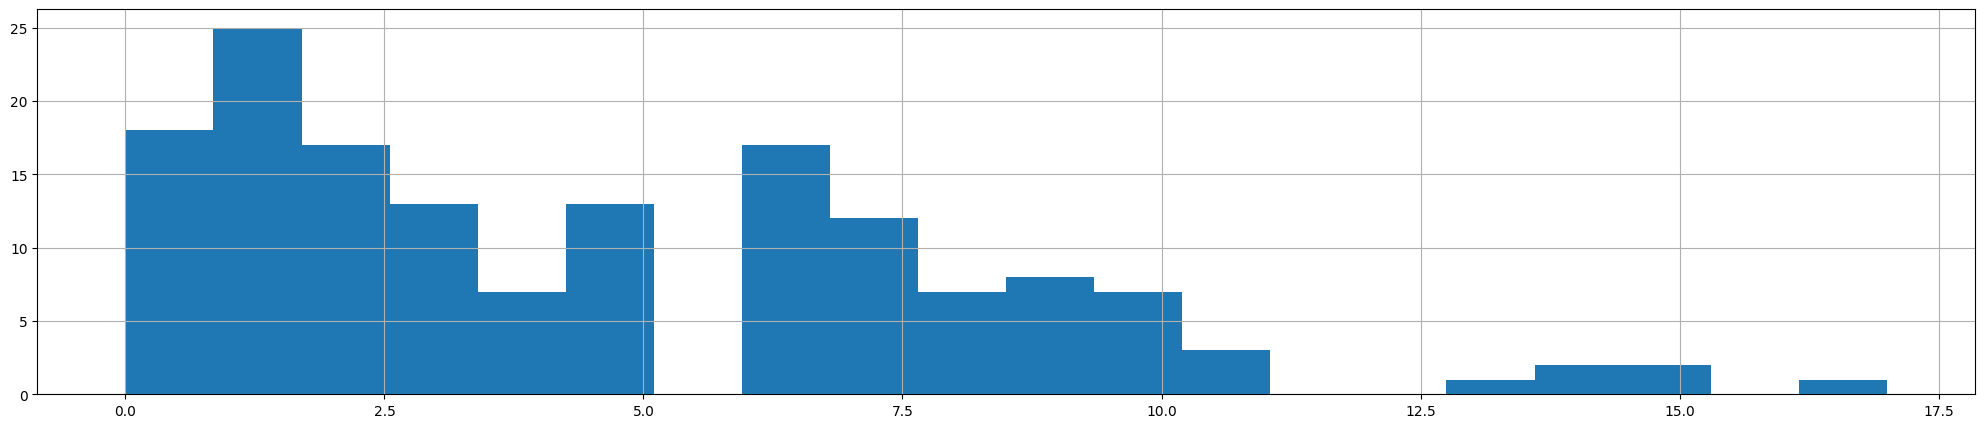

In [60]:
df_dev_orig["encs"].str.len().hist(figsize=(25, 5), bins=20)

In [63]:
df_dev_orig[df_dev_orig["encs"].str.len() == 2]

,ocr,verdicts,text,lan,fb,tw,ig,full_text,gs,preds,preds_ie,cands,new_preds,encs,full_text_encs,preds_encs
post_id,,,,,,,,,,,,,,,,
4104,les Républicains Twe les Républicains [USER] N...,False information,(C'est un semi-fake mais c'est marrant quand m...,fra,1,0,0,les Républicains Twe les Républicains - 10 mi...,[83215],"[83215, 155774, 82361, 115805, 3942, 82318, 87...","[155761, 83215, 82850, 82785, 82361, 52264, 10...","[52264, 82361, 83215, 156184]","[52264, 82361, 83215, 156184, 155774, 115805, ...","[Valérie_Pécresse, Centime]",Valérie Pécresse Centime les Républicains Twe ...,"[83215, 82361, 115805, 82850, 52264, 3273, 749..."
4655,,,5000 anglophones du SUD-OUEST sont allé sommer...,fra,1,0,0,5000 anglophones du SUD-OUEST sont allé somme...,[10411],"[10411, 9699, 136135, 81541, 10842, 36499, 366...","[10411, 156184, 156189, 156265, 156329, 156376...",[10411],"[10411, 9699, 136135, 81541, 10842, 36499, 366...","[Sporting_Club_bastiais, Lebialem]",Sporting Club bastiais Lebialem 5000 anglopho...,"[10411, 9699, 81168, 136135, 36499, 137298, 36..."
5330,,False information,"ATTENTION, LE PORTUGAL RESTERAIS CONFINÉ PENDA...",fra,1,0,0,"ATTENTION, LE PORTUGAL RESTERAIS CONFINÉ PEND...",[82396],"[82396, 79479, 107992, 52699, 119945, 79367, 2...","[8997, 9342, 155819, 155833, 155838, 153952, 1...",[],"[82396, 79479, 107992, 52699, 119945, 79367, 2...","[SARS-CoV-2, Portugal]","SARS-CoV-2 Portugal ATTENTION, LE PORTUGAL RE...","[82396, 79479, 107992, 119945, 52699, 79314, 1..."
6737,,False information.,Biden et son électorat d’escros obligé de tric...,fra,1,0,0,Biden et son électorat d’escros obligé de tri...,[8800],"[8800, 136135, 44754, 44303, 9699, 83396, 5227...","[8800, 156184, 156189, 156265, 156329, 156376,...",[8800],"[8800, 136135, 44754, 44303, 9699, 83396, 5227...","[Wisconsin, L'Élu_(film)]",Wisconsin L'Élu (film) Biden et son électorat...,"[8800, 136135, 44303, 83396, 44754, 147139, 96..."
7506,,Partly false information,Cette photo n’arrive pas d’Ukraine mais du Yém...,fra,1,0,0,Cette photo n’arrive pas d’Ukraine mais du Yé...,[36657],"[36679, 36657, 36683, 138071, 138072, 36558, 8...","[9353, 155777, 151667, 153926, 146186, 146762,...","[138248, 138277]","[138248, 138277, 36679, 36657, 36683, 138071, ...","[Ukraine, Yémen]",Ukraine Yémen Cette photo n’arrive pas d’Ukra...,"[36679, 36657, 36683, 36558, 83461, 138083, 44..."
9612,Décès causés par la grippe: - 2014/2015: 18.30...,False information,"En cet hiver 2020, la grippe classique, elle, ...",fra,1,0,0,Décès causés par la grippe: - 2014/2015: 18.30...,[80763],"[80763, 63900, 79347, 80764, 79577, 118904, 91...","[80763, 153952, 137224, 138186, 102477, 97958,...",[80763],"[80763, 63900, 79347, 80764, 79577, 118904, 91...","[Grippe, Enchantement]",Grippe Enchantement Décès causés par la grippe...,"[80763, 63900, 79347, 80764, 79577, 8997, 1189..."
10569,,False information.,Flash !!!! Le président fatshi vient de doté 3...,fra,1,0,0,Flash !!!! Le président fatshi vient de doté ...,[61673],"[61673, 136733, 82797, 79419, 36485, 79939, 13...","[153963, 146900, 138199, 138178, 137941, 13727...",[],"[61673, 136733, 82797, 79419, 36485, 79939, 13...","[Congo_belge, Adobe_Flash]",Congo belge Adobe Flash Flash !!!! Le préside...,"[61673, 36599, 137024, 36485, 136733, 138216, ..."
12150,,Missing context,"Inondations à l’hôpital, la salle de réanimati...",fra,1,0,0,"Inondations à l’hôpital, la salle de réanimat...",[137026],"[137026, 137941, 82436, 83339, 36446, 82849, 1...","[5171, 6452, 8937, 155837, 155846, 155792, 155...",[],"[137026, 137941, 82436, 83339, 36446, 82849, 1...","[Sénégal, Eau]","Sénégal Eau Inondations à l’hôpital, la salle...","[137026, 82436, 137941, 10336, 82849, 138063, ..."
13537,,,Le Golden Gate Bridge le jour de son ouverture...,fra,1,0,0,Le Golden Gate Bridge le jour de son ouvertur...,[36628],"[36628, 36528, 138199, 137211, 57010, 82451, 3...","[36628, 156184, 156189, 156265, 156329, 156376...",[36628],"[36628, 36528, 138199, 137211, 57010, 82451, 3.

In [ ]:
df_dev_orig["ft_len"] = df_dev_orig["full_text"].str.len()
df_dev_orig["full_text_encs"] = df_dev_orig["full_text"]
df_dev_orig.loc[(df_dev_orig["ft_len"] > 1000), "full_text_encs"] = df_dev_orig.loc[df_dev_orig["ft_len"] > 1000, "encs"].

In [ ]:
df_dev_orig["full_text_encs"] = df_dev_orig["encs"].str.join(" ").str.replace("_", " ") + " " + df_dev_orig["full_text"]

<Axes: >

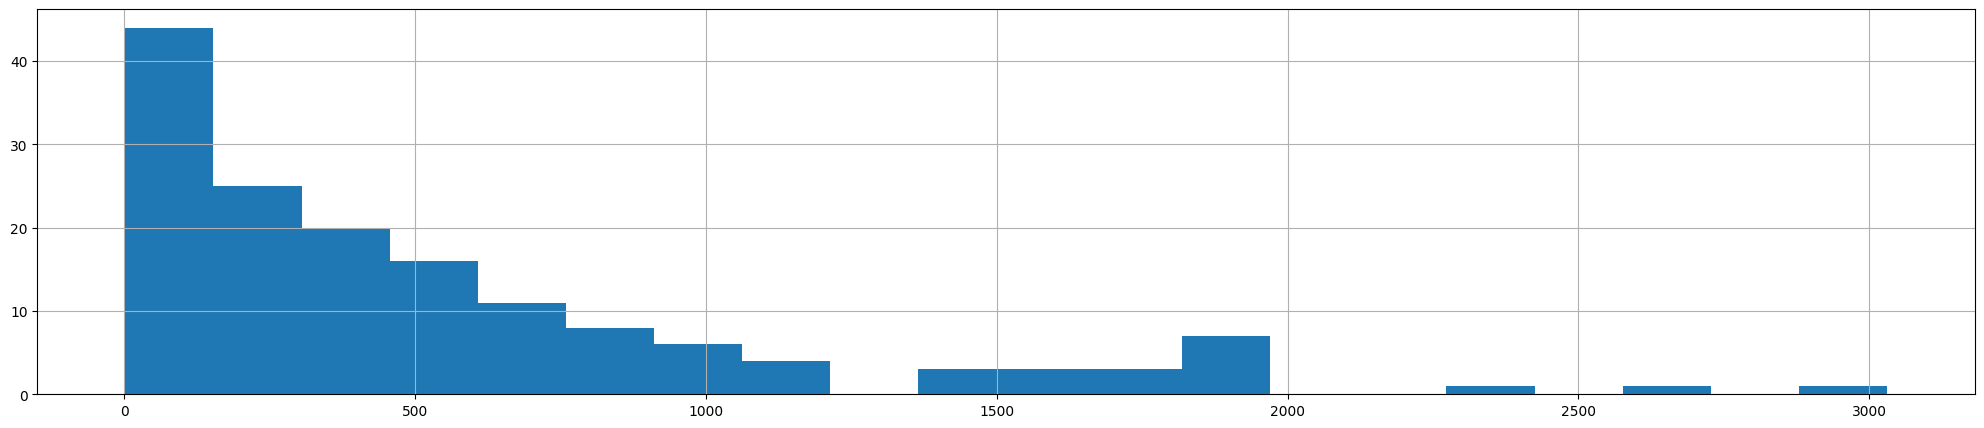

In [65]:
df_dev_orig["full_text"].str.len().hist(figsize=(25, 5), bins=20)

In [52]:
df_dev_orig["preds_ie"] = ie_model_es.predict(df_dev_orig["full_text"].values)

Processing texts:   0%|          | 0/153 [00:00<?, ?it/s]

batch_size 2048


Processing texts: 100%|██████████| 153/153 [00:04<00:00, 33.27it/s]


In [57]:
df_dev_orig["preds_encs"] = model.predict(df_dev_orig["full_text_encs"].values).tolist()

Batches: 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


In [11]:
df_dev_orig["preds"].str.len()

post_id
291      4355
675      4355
1073     4355
1292     4355
1299     4355
         ... 
27843    4355
27856    4355
27882    4355
27896    4355
27897    4355
Name: preds, Length: 153, dtype: int64

In [12]:
model.evaluate(df_dev_orig, task_name=task_name, lang=lang)

{'monolingual': {'fra': {1: np.float64(0.7320261437908496),
   3: np.float64(0.8431372549019608),
   5: np.float64(0.8562091503267973),
   10: np.float64(0.869281045751634)}}}

In [ ]:
df_dev_orig.apply(lambda x: len(np.intersect1d(x["preds_ie"][:10], x["preds"][:100])), axis=1).describe()

count    153.000000
mean       1.183007
std        1.243075
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
dtype: float64

In [23]:
df_dev_orig["cands"] = df_dev_orig.apply(lambda x: list(np.intersect1d(x["preds_ie"][:10], x["preds"][:20])), axis=1)

In [24]:
df_dev_orig["cands"].str.len().describe()

count    153.000000
mean       1.516340
std        1.464962
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: cands, dtype: float64

In [25]:
df_dev_orig["new_preds"]  = df_dev_orig.apply(lambda x: x["cands"] + [y for y in x["preds"] if y not in x["cands"]], axis=1)

In [26]:
df_dev_new = df_dev_orig.copy()
df_dev_new["preds"] = df_dev_new["new_preds"]

In [27]:
model.evaluate(df_dev_orig, task_name=task_name, lang=lang)

{'monolingual': {'fra': {1: np.float64(0.7320261437908496),
   3: np.float64(0.8431372549019608),
   5: np.float64(0.8562091503267973),
   10: np.float64(0.869281045751634)}}}

In [28]:
model.evaluate(df_dev_new, task_name=task_name, lang=lang)

{'monolingual': {'fra': {1: np.float64(0.38562091503267976),
   3: np.float64(0.7973856209150327),
   5: np.float64(0.8496732026143791),
   10: np.float64(0.869281045751634)}}}

In [21]:
df_dev_ie = df_dev_orig.copy()
df_dev_ie["preds"] = df_dev_ie["preds_ie"]

In [22]:
model.evaluate(df_dev_ie, task_name=task_name, lang=lang)

{'monolingual': {'fra': {1: np.float64(0.2549019607843137),
   3: np.float64(0.3660130718954248),
   5: np.float64(0.38562091503267976),
   10: np.float64(0.43790849673202614)}}}

In [58]:
df_dev_encs = df_dev_orig.copy()
df_dev_encs["preds"] = df_dev_encs["preds_encs"]

model.evaluate(df_dev_encs, task_name=task_name, lang=lang)

{'monolingual': {'fra': {1: np.float64(0.7058823529411765),
   3: np.float64(0.8366013071895425),
   5: np.float64(0.8496732026143791),
   10: np.float64(0.8562091503267973)}}}